# Human Activity Recognition  

Task: Improve baseline 91% accuracy using -  
1. (1) LSTM layer with varying LSTM units  
2. Try multiple Dropout rates  
3. (2) LSTM layers + Larger Dropouts  

In [15]:
import numpy as np
import pandas as pd
import keras 
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, LSTM, CuDNNLSTM, Bidirectional, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import itertools
import time
from keras import optimizers


In [2]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [3]:
# Data directory
DATADIR = 'UCI_HAR_Dataset'

In [4]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [5]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).values
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [6]:
def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).values

In [7]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [9]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [10]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

In [11]:
# setup class labels
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [12]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


In [25]:
%matplotlib notebook

# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b'], title=''):
    ax.plot(x, vy, 'b', label='Validation Loss')
    ax.plot(x, ty, 'r', label='Train Loss')
    plt.legend()
    plt.grid()
    plt.title(title)
    fig.canvas.draw()
    plt.show()

# Learning rate to 1e-4

In [16]:
# setting Learning rate to 1e-4
rmsprop = optimizers.RMSprop(lr=0.0001)


# Introduction of Dense(5) Layer Before Last Layer

Starting tuning with dropout rate of 0.0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_84 (CuDNNLSTM)    (None, 128, 256)          273408    
_________________________________________________________________
dropout_89 (Dropout)         (None, 128, 256)          0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 128, 256)          1024      
_________________________________________________________________
cu_dnnlstm_85 (CuDNNLSTM)    (None, 256)               526336    
_________________________________________________________________
dropout_90 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 5)                 1285      
_________________________________________________________________
dense_57 (Dense)             (None,

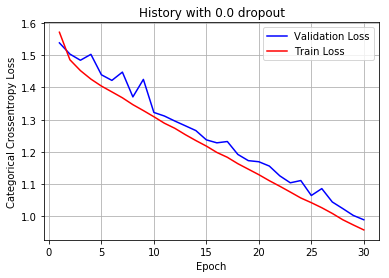

Test Loss: 0.9893
Test Accuracy: 0.9308

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  4      412        74        1                   0   
STANDING                 0       87       443        2                   0   
WALKING                  0        0         2      481                   2   
WALKING_DOWNSTAIRS       0        0         0        0                 407   
WALKING_UPSTAIRS         0        0         1        7                   0   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            0  
STANDING                           0  
WALKING                           11  
WALKING_DOWNSTAIRS                13  
WALKING_UPSTAIRS                 463  
Starting tuning with d

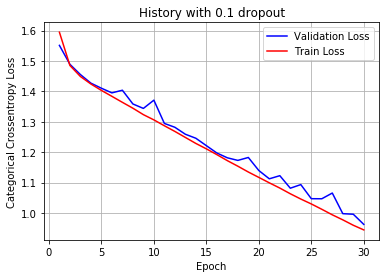

Test Loss: 0.9626
Test Accuracy: 0.7750

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_UPSTAIRS
True                                                                    
LAYING                 537        0         0        0                 0
SITTING                  7      425        41        0                18
STANDING                 0      143       389        0                 0
WALKING                 21        2         0      473                 0
WALKING_DOWNSTAIRS     420        0         0        0                 0
WALKING_UPSTAIRS         6        0         0        5               460
Starting tuning with dropout rate of 0.2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_88 (CuDNNLSTM)    (None, 128, 256)          273408    
_________________________________________________________________
dropout_93 (Dropout)         (None, 128, 256)          0         
____

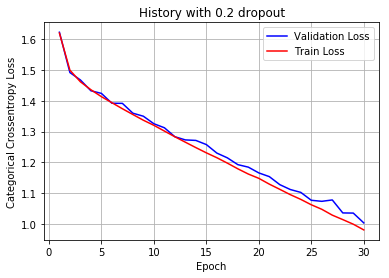

Test Loss: 1.0031
Test Accuracy: 0.7723

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_UPSTAIRS
True                                                                    
LAYING                 537        0         0        0                 0
SITTING                  6      307       159        0                19
STANDING                 0       28       487        1                16
WALKING                  0        1        11      481                 3
WALKING_DOWNSTAIRS       0        0       419        0                 1
WALKING_UPSTAIRS         0        3         0        4               464
Starting tuning with dropout rate of 0.3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_90 (CuDNNLSTM)    (None, 128, 256)          273408    
_________________________________________________________________
dropout_95 (Dropout)         (None, 128, 256)          0         
____

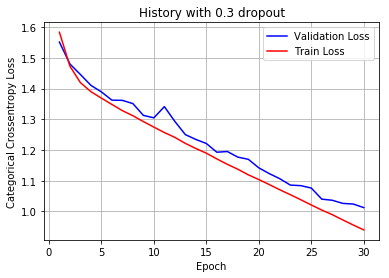

Test Loss: 1.0124
Test Accuracy: 0.9108

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  4      415        68        1                   0   
STANDING                 0       93       439        0                   0   
WALKING                  0        0         0      408                  50   
WALKING_DOWNSTAIRS       0        0         0        1                 415   
WALKING_UPSTAIRS         0        0         0        0                   1   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            3  
STANDING                           0  
WALKING                           38  
WALKING_DOWNSTAIRS                 4  
WALKING_UPSTAIRS                 470  
Starting tuning with d

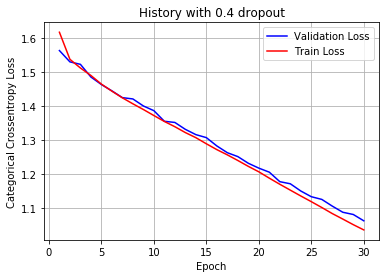

Test Loss: 1.0635
Test Accuracy: 0.9192

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  6      417        67        0                   0   
STANDING                 0      110       421        1                   0   
WALKING                  3        1         5      448                  24   
WALKING_DOWNSTAIRS       0        0         0        0                 420   
WALKING_UPSTAIRS         0        0         0        4                   1   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            1  
STANDING                           0  
WALKING                           15  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 466  
Starting tuning with d

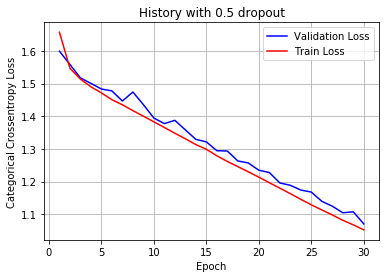

Test Loss: 1.0704
Test Accuracy: 0.9311

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  3      411        70        0                   0   
STANDING                 0       91       437        4                   0   
WALKING                  0        1         6      485                   3   
WALKING_DOWNSTAIRS       0        0         0        4                 416   
WALKING_UPSTAIRS         0        0         0       12                   1   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            7  
STANDING                           0  
WALKING                            1  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 458  
Starting tuning with d

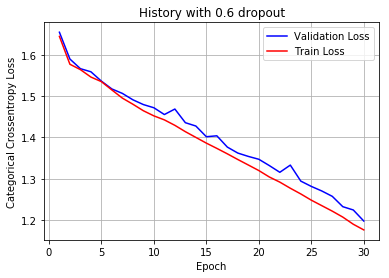

Test Loss: 1.1979
Test Accuracy: 0.7648

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_UPSTAIRS
True                                                                    
LAYING                 537        0         0        0                 0
SITTING                  3      376       101       10                 1
STANDING                 0       81       445        6                 0
WALKING                  0        0         0      461                35
WALKING_DOWNSTAIRS       0        0         0        2               418
WALKING_UPSTAIRS         0        0         2       34               435
Starting tuning with dropout rate of 0.7
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_98 (CuDNNLSTM)    (None, 128, 256)          273408    
_________________________________________________________________
dropout_103 (Dropout)        (None, 128, 256)          0         
____

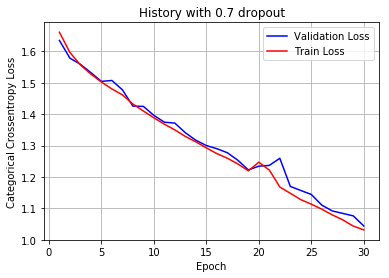

Test Loss: 1.0442
Test Accuracy: 0.7791

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_UPSTAIRS
True                                                                    
LAYING                 537        0         0        0                 0
SITTING                  8      442        24        1                16
STANDING                 1      151       367       13                 0
WALKING                  0        0         0      495                 1
WALKING_DOWNSTAIRS       0        0         0      414                 6
WALKING_UPSTAIRS         0        0         0       16               455
Starting tuning with dropout rate of 0.8
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_100 (CuDNNLSTM)   (None, 128, 256)          273408    
_________________________________________________________________
dropout_105 (Dropout)        (None, 128, 256)          0         
____

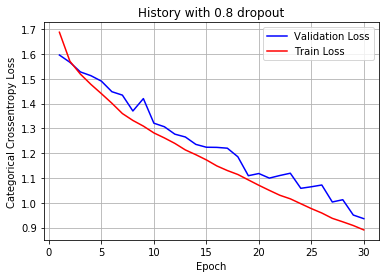

Test Loss: 0.9361
Test Accuracy: 0.8945

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 513        0         0        0                   0   
SITTING                  0      375       108        8                   0   
STANDING                 0       88       442        2                   0   
WALKING                  0        0         3      466                   2   
WALKING_DOWNSTAIRS       1        0         0        3                 414   
WALKING_UPSTAIRS         0        0         0       43                   2   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            24  
SITTING                            0  
STANDING                           0  
WALKING                           25  
WALKING_DOWNSTAIRS                 2  
WALKING_UPSTAIRS                 426  
Starting tuning with d

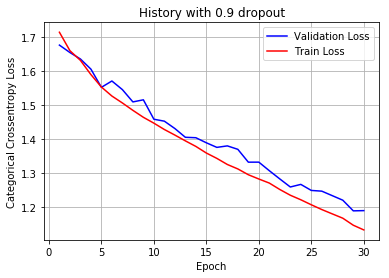

Test Loss: 1.1899
Test Accuracy: 0.6149

Pred                LAYING  SITTING  STANDING  WALKING
True                                                  
LAYING                 509        0        28        0
SITTING                  0      355       136        0
STANDING                 0       44       488        0
WALKING                 15        0        21      460
WALKING_DOWNSTAIRS     329       11        18       62
WALKING_UPSTAIRS         2       11       455        3


In [30]:
%matplotlib inline
# using a dense layer of 5 connections before last layer

drop = np.arange(0,1,.1)

for d in range(len(drop)):
    
    print(f'Starting tuning with dropout rate of {drop[d]:.1f}')
    
    # build keras model
    model = Sequential()
    model.add(CuDNNLSTM(256, input_shape=(timesteps, input_dim), return_sequences=True))
    model.add(Dropout(drop[d]))
    model.add(BatchNormalization())
    model.add(CuDNNLSTM(256))
    model.add(Dropout(drop[d]))
    model.add(Dense(5, activation='sigmoid'))
    model.add(Dense(n_classes, activation='sigmoid'))
    model.summary()

    model.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy',])


    history = model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

    vy = history.history['val_loss']
    ty = history.history['loss']

    fig, ax = plt.subplots(1,1)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Categorical Crossentropy Loss')

    x = list(range(1,31))

    # plot train and test loss
    plt_dynamic(x, vy, ty, ax, title=f'History with {drop[d]:.1f} dropout')

    scores, acc = model.evaluate(X_test, Y_test, verbose=0)
    print(f'Test Loss: {scores:.4f}')
    print(f'Test Accuracy: {acc:.4f}')

    # print confusion matrix
    print(f'\n{confusion_matrix(Y_test, model.predict(X_test))}')

Starting tuning with dropout rate of 0.0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_108 (CuDNNLSTM)   (None, 128, 256)          273408    
_________________________________________________________________
dropout_113 (Dropout)        (None, 128, 256)          0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 128, 256)          1024      
_________________________________________________________________
cu_dnnlstm_109 (CuDNNLSTM)   (None, 256)               526336    
_________________________________________________________________
dropout_114 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 5)                 1285      
_________________________________________________________________
dense_81 (Dense)             (None,

Epoch 82/100
 - 6s - loss: 0.4683 - acc: 0.9676 - val_loss: 0.5168 - val_acc: 0.9399
Epoch 83/100
 - 6s - loss: 0.4598 - acc: 0.9703 - val_loss: 0.5630 - val_acc: 0.9125
Epoch 84/100
 - 6s - loss: 0.4559 - acc: 0.9698 - val_loss: 0.5246 - val_acc: 0.9325
Epoch 85/100
 - 6s - loss: 0.4452 - acc: 0.9687 - val_loss: 0.4882 - val_acc: 0.9433
Epoch 86/100
 - 6s - loss: 0.4357 - acc: 0.9702 - val_loss: 0.5032 - val_acc: 0.9369
Epoch 87/100
 - 6s - loss: 0.4291 - acc: 0.9694 - val_loss: 0.4767 - val_acc: 0.9406
Epoch 88/100
 - 6s - loss: 0.4186 - acc: 0.9705 - val_loss: 0.5002 - val_acc: 0.9277
Epoch 89/100
 - 6s - loss: 0.4150 - acc: 0.9690 - val_loss: 0.4450 - val_acc: 0.9522
Epoch 90/100
 - 6s - loss: 0.4093 - acc: 0.9683 - val_loss: 0.4653 - val_acc: 0.9389
Epoch 91/100
 - 6s - loss: 0.3957 - acc: 0.9713 - val_loss: 0.4443 - val_acc: 0.9433
Epoch 92/100
 - 6s - loss: 0.3932 - acc: 0.9697 - val_loss: 0.4653 - val_acc: 0.9376
Epoch 93/100
 - 6s - loss: 0.3850 - acc: 0.9709 - val_loss: 0.491

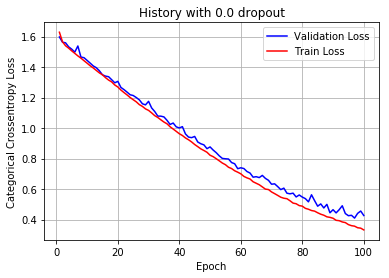

Test Loss: 0.4271
Test Accuracy: 0.9345

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  0      385       103        1                   0   
STANDING                 0       22       507        1                   0   
WALKING                  0        0         0      457                  39   
WALKING_DOWNSTAIRS       0        0         0        0                 414   
WALKING_UPSTAIRS         0        3         0        1                  13   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            2  
STANDING                           2  
WALKING                            0  
WALKING_DOWNSTAIRS                 6  
WALKING_UPSTAIRS                 454  
Starting tuning with d

 - 6s - loss: 0.5004 - acc: 0.9596 - val_loss: 0.5469 - val_acc: 0.9298
Epoch 71/100
 - 6s - loss: 0.4884 - acc: 0.9630 - val_loss: 0.5422 - val_acc: 0.9298
Epoch 72/100
 - 6s - loss: 0.4777 - acc: 0.9657 - val_loss: 0.5236 - val_acc: 0.9253
Epoch 73/100
 - 6s - loss: 0.4682 - acc: 0.9660 - val_loss: 0.5146 - val_acc: 0.9304
Epoch 74/100
 - 6s - loss: 0.4612 - acc: 0.9642 - val_loss: 0.5040 - val_acc: 0.9342
Epoch 75/100
 - 6s - loss: 0.4520 - acc: 0.9648 - val_loss: 0.4996 - val_acc: 0.9376
Epoch 76/100
 - 6s - loss: 0.4417 - acc: 0.9660 - val_loss: 0.4920 - val_acc: 0.9308
Epoch 77/100
 - 6s - loss: 0.4332 - acc: 0.9667 - val_loss: 0.4936 - val_acc: 0.9213
Epoch 78/100
 - 6s - loss: 0.4269 - acc: 0.9640 - val_loss: 0.4872 - val_acc: 0.9240
Epoch 79/100
 - 6s - loss: 0.4171 - acc: 0.9655 - val_loss: 0.4765 - val_acc: 0.9342
Epoch 80/100
 - 6s - loss: 0.4104 - acc: 0.9644 - val_loss: 0.4804 - val_acc: 0.9301
Epoch 81/100
 - 6s - loss: 0.4028 - acc: 0.9656 - val_loss: 0.4646 - val_acc: 

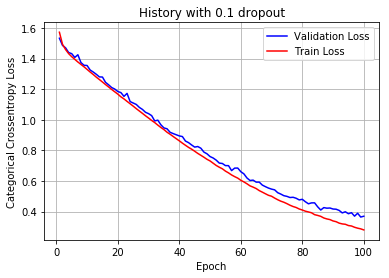

Test Loss: 0.3697
Test Accuracy: 0.9345

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  1      401        84        1                   0   
STANDING                 0       41       491        0                   0   
WALKING                  0        0         1      460                  28   
WALKING_DOWNSTAIRS       0        0         0        0                 415   
WALKING_UPSTAIRS         0        2         0        1                  18   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            4  
STANDING                           0  
WALKING                            7  
WALKING_DOWNSTAIRS                 5  
WALKING_UPSTAIRS                 450  
Starting tuning with d

 - 6s - loss: 0.4556 - acc: 0.9672 - val_loss: 0.5009 - val_acc: 0.9318
Epoch 71/100
 - 6s - loss: 0.4505 - acc: 0.9631 - val_loss: 0.4918 - val_acc: 0.9304
Epoch 72/100
 - 6s - loss: 0.4433 - acc: 0.9661 - val_loss: 0.5028 - val_acc: 0.9294
Epoch 73/100
 - 6s - loss: 0.4377 - acc: 0.9625 - val_loss: 0.4964 - val_acc: 0.9192
Epoch 74/100
 - 6s - loss: 0.4320 - acc: 0.9633 - val_loss: 0.5016 - val_acc: 0.9226
Epoch 75/100
 - 6s - loss: 0.4242 - acc: 0.9650 - val_loss: 0.4631 - val_acc: 0.9457
Epoch 76/100
 - 6s - loss: 0.4185 - acc: 0.9634 - val_loss: 0.4721 - val_acc: 0.9389
Epoch 77/100
 - 6s - loss: 0.4134 - acc: 0.9641 - val_loss: 0.4739 - val_acc: 0.9189
Epoch 78/100
 - 6s - loss: 0.4065 - acc: 0.9644 - val_loss: 0.4615 - val_acc: 0.9311
Epoch 79/100
 - 6s - loss: 0.3990 - acc: 0.9672 - val_loss: 0.4485 - val_acc: 0.9294
Epoch 80/100
 - 6s - loss: 0.3925 - acc: 0.9663 - val_loss: 0.4568 - val_acc: 0.9301
Epoch 81/100
 - 6s - loss: 0.3903 - acc: 0.9629 - val_loss: 0.4409 - val_acc: 

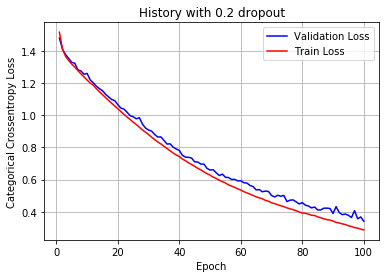

Test Loss: 0.3414
Test Accuracy: 0.9430

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  0      408        80        0                   0   
STANDING                 0       56       476        0                   0   
WALKING                  0        0         1      492                   3   
WALKING_DOWNSTAIRS       0        0         0        2                 415   
WALKING_UPSTAIRS         6        1         0        8                   5   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            3  
STANDING                           0  
WALKING                            0  
WALKING_DOWNSTAIRS                 3  
WALKING_UPSTAIRS                 451  
Starting tuning with d

 - 6s - loss: 0.5794 - acc: 0.8262 - val_loss: 0.6643 - val_acc: 0.7872
Epoch 71/100
 - 6s - loss: 0.5731 - acc: 0.8268 - val_loss: 0.6614 - val_acc: 0.7784
Epoch 72/100
 - 6s - loss: 0.5656 - acc: 0.8282 - val_loss: 0.6286 - val_acc: 0.7906
Epoch 73/100
 - 6s - loss: 0.5616 - acc: 0.8267 - val_loss: 0.6330 - val_acc: 0.7859
Epoch 74/100
 - 6s - loss: 0.5561 - acc: 0.8262 - val_loss: 0.6168 - val_acc: 0.8012
Epoch 75/100
 - 6s - loss: 0.5476 - acc: 0.8268 - val_loss: 0.5898 - val_acc: 0.8029
Epoch 76/100
 - 6s - loss: 0.5387 - acc: 0.8311 - val_loss: 0.5935 - val_acc: 0.8062
Epoch 77/100
 - 6s - loss: 0.5363 - acc: 0.8282 - val_loss: 0.6281 - val_acc: 0.7862
Epoch 78/100
 - 6s - loss: 0.5315 - acc: 0.8285 - val_loss: 0.6192 - val_acc: 0.7876
Epoch 79/100
 - 6s - loss: 0.5256 - acc: 0.8286 - val_loss: 0.5956 - val_acc: 0.7900
Epoch 80/100
 - 6s - loss: 0.5191 - acc: 0.8303 - val_loss: 0.5718 - val_acc: 0.7967
Epoch 81/100
 - 6s - loss: 0.5103 - acc: 0.8300 - val_loss: 0.5685 - val_acc: 

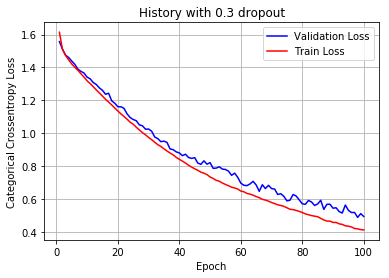

Test Loss: 0.4945
Test Accuracy: 0.7961

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 510        0         0        0                   0   
SITTING                  2      400        88        0                   0   
STANDING                 0       36       496        0                   0   
WALKING                  2        1         0      484                   0   
WALKING_DOWNSTAIRS       1        0         0        1                   0   
WALKING_UPSTAIRS         0        1         0       13                   1   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            27  
SITTING                            1  
STANDING                           0  
WALKING                            9  
WALKING_DOWNSTAIRS               418  
WALKING_UPSTAIRS                 456  
Starting tuning with d

 - 6s - loss: 0.6909 - acc: 0.8334 - val_loss: 0.7505 - val_acc: 0.7967
Epoch 71/100
 - 6s - loss: 0.6813 - acc: 0.8327 - val_loss: 0.7545 - val_acc: 0.7883
Epoch 72/100
 - 6s - loss: 0.6710 - acc: 0.8331 - val_loss: 0.7197 - val_acc: 0.8008
Epoch 73/100
 - 6s - loss: 0.6626 - acc: 0.8331 - val_loss: 0.7314 - val_acc: 0.7913
Epoch 74/100
 - 6s - loss: 0.6544 - acc: 0.8326 - val_loss: 0.7166 - val_acc: 0.7913
Epoch 75/100
 - 6s - loss: 0.6441 - acc: 0.8319 - val_loss: 0.7100 - val_acc: 0.7988
Epoch 76/100
 - 6s - loss: 0.6340 - acc: 0.8339 - val_loss: 0.7007 - val_acc: 0.7978
Epoch 77/100
 - 6s - loss: 0.6266 - acc: 0.8346 - val_loss: 0.6784 - val_acc: 0.8056
Epoch 78/100
 - 6s - loss: 0.6161 - acc: 0.8346 - val_loss: 0.6781 - val_acc: 0.7940
Epoch 79/100
 - 6s - loss: 0.6076 - acc: 0.8351 - val_loss: 0.6773 - val_acc: 0.7855
Epoch 80/100
 - 6s - loss: 0.5997 - acc: 0.8347 - val_loss: 0.6627 - val_acc: 0.7981
Epoch 81/100
 - 6s - loss: 0.5920 - acc: 0.8362 - val_loss: 0.6970 - val_acc: 

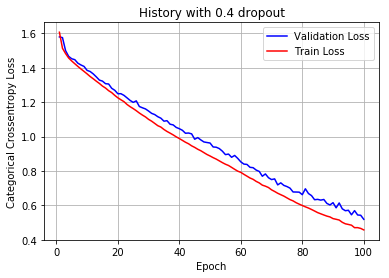

Test Loss: 0.5195
Test Accuracy: 0.8069

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  6      393        90        0                   2   
STANDING                 0       25       506        1                   0   
WALKING                  0        0         0      480                   0   
WALKING_DOWNSTAIRS       0        0         0        0                   0   
WALKING_UPSTAIRS         0        0         0        7                   2   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            0  
STANDING                           0  
WALKING                           16  
WALKING_DOWNSTAIRS               420  
WALKING_UPSTAIRS                 462  
Starting tuning with d

 - 6s - loss: 0.6654 - acc: 0.6848 - val_loss: 0.7475 - val_acc: 0.6318
Epoch 71/100
 - 6s - loss: 0.6625 - acc: 0.6840 - val_loss: 0.7179 - val_acc: 0.6451
Epoch 72/100
 - 6s - loss: 0.6584 - acc: 0.6829 - val_loss: 0.7090 - val_acc: 0.6491
Epoch 73/100
 - 6s - loss: 0.6506 - acc: 0.6834 - val_loss: 0.7228 - val_acc: 0.6383
Epoch 74/100
 - 6s - loss: 0.6425 - acc: 0.6853 - val_loss: 0.7040 - val_acc: 0.6447
Epoch 75/100
 - 6s - loss: 0.6353 - acc: 0.6868 - val_loss: 0.6977 - val_acc: 0.6478
Epoch 76/100
 - 6s - loss: 0.6312 - acc: 0.6868 - val_loss: 0.7228 - val_acc: 0.6339
Epoch 77/100
 - 6s - loss: 0.6247 - acc: 0.6862 - val_loss: 0.7007 - val_acc: 0.6434
Epoch 78/100
 - 6s - loss: 0.6196 - acc: 0.6863 - val_loss: 0.6932 - val_acc: 0.6345
Epoch 79/100
 - 6s - loss: 0.6170 - acc: 0.6827 - val_loss: 0.7154 - val_acc: 0.6413
Epoch 80/100
 - 6s - loss: 0.6053 - acc: 0.6858 - val_loss: 0.6864 - val_acc: 0.6369
Epoch 81/100
 - 6s - loss: 0.5984 - acc: 0.6884 - val_loss: 0.7176 - val_acc: 

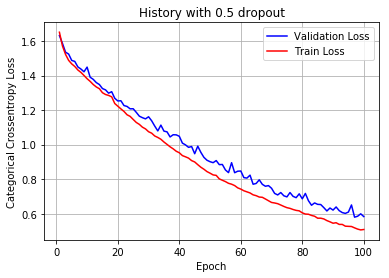

Test Loss: 0.5838
Test Accuracy: 0.7940

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  0      421        67        3                   0   
STANDING                 0       37       494        1                   0   
WALKING                  0        0         5      490                   1   
WALKING_DOWNSTAIRS       0        0         8       14                 397   
WALKING_UPSTAIRS         0        0         4      466                   0   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            0  
STANDING                           0  
WALKING                            0  
WALKING_DOWNSTAIRS                 1  
WALKING_UPSTAIRS                   1  
Starting tuning with d

 - 6s - loss: 0.7071 - acc: 0.7837 - val_loss: 0.7651 - val_acc: 0.7662
Epoch 71/100
 - 6s - loss: 0.7074 - acc: 0.7817 - val_loss: 0.7649 - val_acc: 0.7645
Epoch 72/100
 - 6s - loss: 0.6870 - acc: 0.7858 - val_loss: 0.7487 - val_acc: 0.7723
Epoch 73/100
 - 6s - loss: 0.6769 - acc: 0.7867 - val_loss: 0.7514 - val_acc: 0.7591
Epoch 74/100
 - 6s - loss: 0.6733 - acc: 0.7860 - val_loss: 0.7437 - val_acc: 0.7486
Epoch 75/100
 - 6s - loss: 0.6647 - acc: 0.7869 - val_loss: 0.7483 - val_acc: 0.7581
Epoch 76/100
 - 6s - loss: 0.6580 - acc: 0.7862 - val_loss: 0.7405 - val_acc: 0.7506
Epoch 77/100
 - 6s - loss: 0.6519 - acc: 0.7871 - val_loss: 0.7357 - val_acc: 0.7662
Epoch 78/100
 - 6s - loss: 0.6453 - acc: 0.7882 - val_loss: 0.7208 - val_acc: 0.7720
Epoch 79/100
 - 6s - loss: 0.6390 - acc: 0.7873 - val_loss: 0.7215 - val_acc: 0.7598
Epoch 80/100
 - 6s - loss: 0.6337 - acc: 0.7877 - val_loss: 0.7128 - val_acc: 0.7672
Epoch 81/100
 - 6s - loss: 0.6251 - acc: 0.7885 - val_loss: 0.7204 - val_acc: 

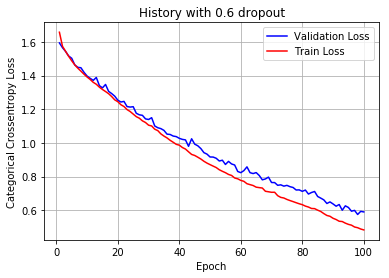

Test Loss: 0.5906
Test Accuracy: 0.7594

Pred                LAYING  SITTING  STANDING  WALKING_DOWNSTAIRS  \
True                                                                
LAYING                 537        0         0                   0   
SITTING                  4      388        93                   0   
STANDING                 0       94       438                   0   
WALKING                  0      464         0                  26   
WALKING_DOWNSTAIRS       0        0         0                 414   
WALKING_UPSTAIRS         0        2         0                   8   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            6  
STANDING                           0  
WALKING                            6  
WALKING_DOWNSTAIRS                 6  
WALKING_UPSTAIRS                 461  
Starting tuning with dropout rate of 0.7
_____________________________________________________

Epoch 71/100
 - 6s - loss: 0.5090 - acc: 0.9423 - val_loss: 0.5733 - val_acc: 0.8873
Epoch 72/100
 - 6s - loss: 0.5035 - acc: 0.9414 - val_loss: 0.5787 - val_acc: 0.8982
Epoch 73/100
 - 6s - loss: 0.4937 - acc: 0.9501 - val_loss: 0.5889 - val_acc: 0.8884
Epoch 74/100
 - 6s - loss: 0.4851 - acc: 0.9518 - val_loss: 0.5623 - val_acc: 0.9036
Epoch 75/100
 - 6s - loss: 0.4773 - acc: 0.9529 - val_loss: 0.5481 - val_acc: 0.9233
Epoch 76/100
 - 6s - loss: 0.4714 - acc: 0.9542 - val_loss: 0.5391 - val_acc: 0.9033
Epoch 77/100
 - 6s - loss: 0.4614 - acc: 0.9563 - val_loss: 0.5491 - val_acc: 0.9084
Epoch 78/100
 - 6s - loss: 0.4599 - acc: 0.9566 - val_loss: 0.5525 - val_acc: 0.8985
Epoch 79/100
 - 6s - loss: 0.4517 - acc: 0.9566 - val_loss: 0.5533 - val_acc: 0.8982
Epoch 80/100
 - 6s - loss: 0.4438 - acc: 0.9558 - val_loss: 0.5072 - val_acc: 0.9220
Epoch 81/100
 - 6s - loss: 0.4369 - acc: 0.9565 - val_loss: 0.5111 - val_acc: 0.9046
Epoch 82/100
 - 6s - loss: 0.4300 - acc: 0.9570 - val_loss: 0.527

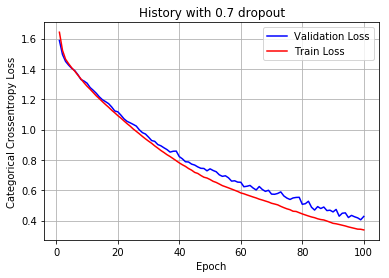

Test Loss: 0.4272
Test Accuracy: 0.9253

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  7      439        28        0                   0   
STANDING                 0      113       419        0                   0   
WALKING                  0        1         5      459                  29   
WALKING_DOWNSTAIRS       0        0         0        0                 419   
WALKING_UPSTAIRS         0        1         0        0                  16   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                           17  
STANDING                           0  
WALKING                            2  
WALKING_DOWNSTAIRS                 1  
WALKING_UPSTAIRS                 454  
Starting tuning with d

 - 6s - loss: 0.7067 - acc: 0.8036 - val_loss: 0.8158 - val_acc: 0.7496
Epoch 71/100
 - 6s - loss: 0.6928 - acc: 0.8075 - val_loss: 0.7849 - val_acc: 0.7513
Epoch 72/100
 - 6s - loss: 0.6840 - acc: 0.8067 - val_loss: 0.7909 - val_acc: 0.7526
Epoch 73/100
 - 6s - loss: 0.6708 - acc: 0.8077 - val_loss: 0.7616 - val_acc: 0.7574
Epoch 74/100
 - 6s - loss: 0.6632 - acc: 0.8092 - val_loss: 0.7485 - val_acc: 0.7557
Epoch 75/100
 - 6s - loss: 0.6554 - acc: 0.8069 - val_loss: 0.7617 - val_acc: 0.7523
Epoch 76/100
 - 6s - loss: 0.6441 - acc: 0.8085 - val_loss: 0.7691 - val_acc: 0.7564
Epoch 77/100
 - 6s - loss: 0.6375 - acc: 0.8088 - val_loss: 0.7114 - val_acc: 0.7584
Epoch 78/100
 - 6s - loss: 0.6335 - acc: 0.8077 - val_loss: 0.7590 - val_acc: 0.7452
Epoch 79/100
 - 6s - loss: 0.6202 - acc: 0.8089 - val_loss: 0.7477 - val_acc: 0.7533
Epoch 80/100
 - 6s - loss: 0.6167 - acc: 0.8085 - val_loss: 0.7101 - val_acc: 0.7523
Epoch 81/100
 - 6s - loss: 0.6088 - acc: 0.8070 - val_loss: 0.6987 - val_acc: 

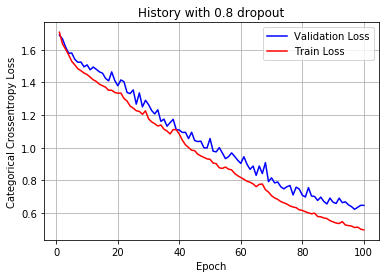

Test Loss: 0.6474
Test Accuracy: 0.7499

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS
True                                                                      
LAYING                 512        0         0       25                   0
SITTING                  2      407        82        0                   0
STANDING                 0      112       420        0                   0
WALKING                  1        0         0      471                  24
WALKING_DOWNSTAIRS       1        0         0       19                 400
WALKING_UPSTAIRS         1        8         3      457                   2
Starting tuning with dropout rate of 0.9
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_126 (CuDNNLSTM)   (None, 128, 256)          273408    
_________________________________________________________________
dropout_131 (Dropout)        (None, 128, 256)         

 - 6s - loss: 0.7964 - acc: 0.6732 - val_loss: 0.8767 - val_acc: 0.6281
Epoch 75/100
 - 6s - loss: 0.7981 - acc: 0.6730 - val_loss: 0.8610 - val_acc: 0.6284
Epoch 76/100
 - 6s - loss: 0.7927 - acc: 0.6719 - val_loss: 0.8346 - val_acc: 0.6335
Epoch 77/100
 - 6s - loss: 0.7847 - acc: 0.6719 - val_loss: 0.8492 - val_acc: 0.6196
Epoch 78/100
 - 6s - loss: 0.7883 - acc: 0.6687 - val_loss: 0.8489 - val_acc: 0.6206
Epoch 79/100
 - 6s - loss: 0.7945 - acc: 0.6695 - val_loss: 0.8427 - val_acc: 0.6200
Epoch 80/100
 - 6s - loss: 0.7757 - acc: 0.6692 - val_loss: 0.8402 - val_acc: 0.6220
Epoch 81/100
 - 6s - loss: 0.7687 - acc: 0.6746 - val_loss: 0.8353 - val_acc: 0.6216
Epoch 82/100
 - 6s - loss: 0.7636 - acc: 0.6741 - val_loss: 0.8219 - val_acc: 0.6257
Epoch 83/100
 - 6s - loss: 0.7963 - acc: 0.6669 - val_loss: 0.8339 - val_acc: 0.6227
Epoch 84/100
 - 6s - loss: 0.7561 - acc: 0.6753 - val_loss: 0.8232 - val_acc: 0.6233
Epoch 85/100
 - 6s - loss: 0.7618 - acc: 0.6732 - val_loss: 0.8309 - val_acc: 

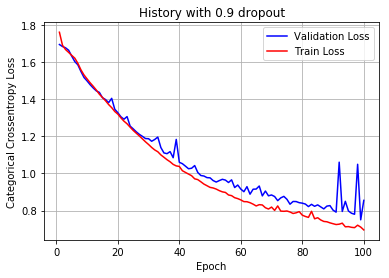

Test Loss: 0.8551
Test Accuracy: 0.6115

Pred                LAYING  SITTING  STANDING  WALKING
True                                                  
LAYING                 522        0        15        0
SITTING                  0      393        98        0
STANDING                 0      104       428        0
WALKING                  0        1        36      459
WALKING_DOWNSTAIRS       0        1         1      418
WALKING_UPSTAIRS         0       15         6      450


In [32]:
%matplotlib inline
# using a dense layer of 5 connections before last layer
# increasing epochs to 100

drop = np.arange(0,1,.1)

for d in range(len(drop)):
    
    print(f'Starting tuning with dropout rate of {drop[d]:.1f}')
    
    # build keras model
    model = Sequential()
    model.add(CuDNNLSTM(256, input_shape=(timesteps, input_dim), return_sequences=True))
    model.add(Dropout(drop[d]))
    model.add(BatchNormalization())
    model.add(CuDNNLSTM(256))
    model.add(Dropout(drop[d]))
    model.add(Dense(5, activation='sigmoid'))
    model.add(Dense(n_classes, activation='sigmoid'))
    model.summary()

    model.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy',])


    history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

    vy = history.history['val_loss']
    ty = history.history['loss']

    fig, ax = plt.subplots(1,1)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Categorical Crossentropy Loss')

    x = list(range(1,101))

    # plot train and test loss
    plt_dynamic(x, vy, ty, ax, title=f'History with {drop[d]:.1f} dropout')

    scores, acc = model.evaluate(X_test, Y_test, verbose=0)
    print(f'Test Loss: {scores:.4f}')
    print(f'Test Accuracy: {acc:.4f}')

    # print confusion matrix
    print(f'\n{confusion_matrix(Y_test, model.predict(X_test))}')

Starting tuning with dropout rate of 0.0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_128 (CuDNNLSTM)   (None, 128, 256)          273408    
_________________________________________________________________
dropout_133 (Dropout)        (None, 128, 256)          0         
_________________________________________________________________
batch_normalization_39 (Batc (None, 128, 256)          1024      
_________________________________________________________________
cu_dnnlstm_129 (CuDNNLSTM)   (None, 256)               526336    
_________________________________________________________________
dropout_134 (Dropout)        (None, 256)               0         
_________________________________________________________________
batch_normalization_40 (Batc (None, 256)               1024      
_________________________________________________________________
dense_100 (Dense)            (None,

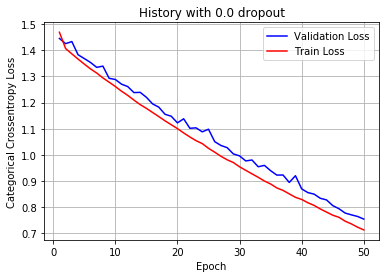

Test Loss: 0.7541
Test Accuracy: 0.9308

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  0      442        47        0                   0   
STANDING                 0      108       424        0                   0   
WALKING                  0        0         0      466                  22   
WALKING_DOWNSTAIRS       0        0         0        0                 419   
WALKING_UPSTAIRS         0        0         0        1                  15   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            2  
STANDING                           0  
WALKING                            8  
WALKING_DOWNSTAIRS                 1  
WALKING_UPSTAIRS                 455  
Starting tuning with d

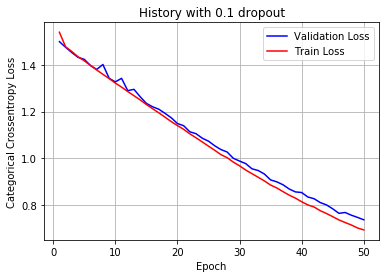

Test Loss: 0.7378
Test Accuracy: 0.7635

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  6      379       105        0                   1   
STANDING                 0       76       455        1                   0   
WALKING                  0        0         0      477                  19   
WALKING_DOWNSTAIRS       0        0         0       17                 402   
WALKING_UPSTAIRS         0        0         0      470                   1   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            0  
STANDING                           0  
WALKING                            0  
WALKING_DOWNSTAIRS                 1  
WALKING_UPSTAIRS                   0  
Starting tuning with d

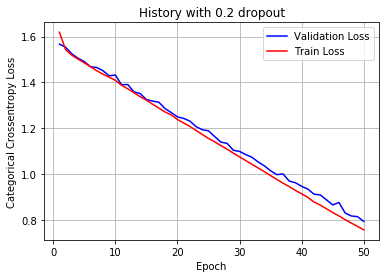

Test Loss: 0.7935
Test Accuracy: 0.9291

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  2      413        74        0                   0   
STANDING                 0       62       469        1                   0   
WALKING                  0        0         1      454                  35   
WALKING_DOWNSTAIRS       0        0         0        0                 420   
WALKING_UPSTAIRS         0        0         0        0                  26   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            2  
STANDING                           0  
WALKING                            6  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 445  
Starting tuning with d

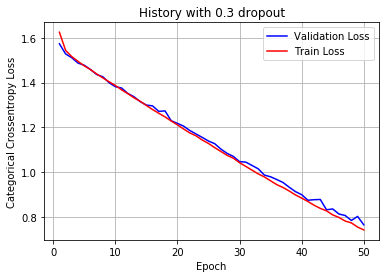

Test Loss: 0.7652
Test Accuracy: 0.9277

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  4      415        69        0                   0   
STANDING                 0       95       436        1                   0   
WALKING                  0        5         0      475                  13   
WALKING_DOWNSTAIRS       0        0         0        0                 420   
WALKING_UPSTAIRS         0        1         0        5                  14   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            3  
STANDING                           0  
WALKING                            3  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 451  
Starting tuning with d

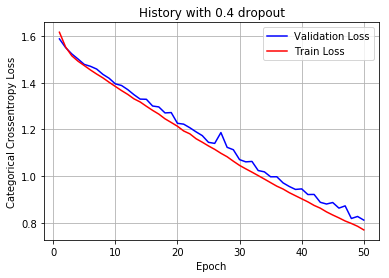

Test Loss: 0.8118
Test Accuracy: 0.9226

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  0      380       110        0                   0   
STANDING                 0       66       466        0                   0   
WALKING                  0        0         0      475                  19   
WALKING_DOWNSTAIRS       0        0         0        3                 405   
WALKING_UPSTAIRS         0        0         0       11                   4   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            1  
STANDING                           0  
WALKING                            2  
WALKING_DOWNSTAIRS                12  
WALKING_UPSTAIRS                 456  
Starting tuning with d

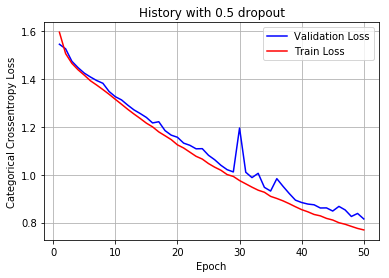

Test Loss: 0.8151
Test Accuracy: 0.4876

Pred                LAYING  SITTING  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                                                     
LAYING                 537        0                   0                 0
SITTING                  5      480                   6                 0
STANDING                 1      531                   0                 0
WALKING                466        2                  28                 0
WALKING_DOWNSTAIRS       1        0                 419                 0
WALKING_UPSTAIRS         1        0                 469                 1
Starting tuning with dropout rate of 0.6
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_140 (CuDNNLSTM)   (None, 128, 256)          273408    
_________________________________________________________________
dropout_145 (Dropout)        (None, 128, 256)          0      

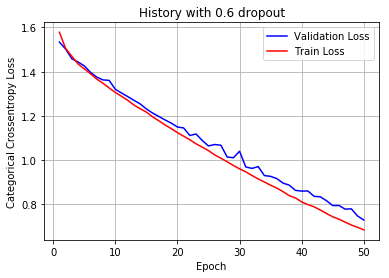

Test Loss: 0.7294
Test Accuracy: 0.9148

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 520        0         0        0                   0   
SITTING                  0      424        61        0                   0   
STANDING                 0      112       419        1                   0   
WALKING                  0        0         0      483                  11   
WALKING_DOWNSTAIRS       0        0         0        6                 406   
WALKING_UPSTAIRS         0        0         0       23                   4   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            17  
SITTING                            6  
STANDING                           0  
WALKING                            2  
WALKING_DOWNSTAIRS                 8  
WALKING_UPSTAIRS                 444  
Starting tuning with d

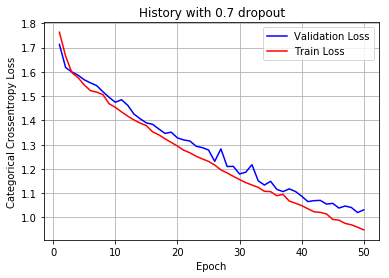

Test Loss: 1.0314
Test Accuracy: 0.6413

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                 37       20        15        0                   0   
STANDING               362       18        24        8                   0   
WALKING                  0        0         0      488                   6   
WALKING_DOWNSTAIRS       0        0         0       17                 403   
WALKING_UPSTAIRS         0        0         0       49                   4   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                          419  
STANDING                         120  
WALKING                            2  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 418  
Starting tuning with d

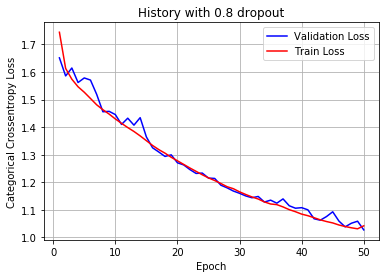

Test Loss: 1.0274
Test Accuracy: 0.5911

Pred                LAYING  STANDING  WALKING  WALKING_UPSTAIRS
True                                                           
LAYING                 517        19        1                 0
SITTING                  0       491        0                 0
STANDING                 0       532        0                 0
WALKING                  0         0      494                 2
WALKING_DOWNSTAIRS       0         0      420                 0
WALKING_UPSTAIRS         0         2      270               199
Starting tuning with dropout rate of 0.9
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_146 (CuDNNLSTM)   (None, 128, 256)          273408    
_________________________________________________________________
dropout_151 (Dropout)        (None, 128, 256)          0         
_________________________________________________________________
batch_norm

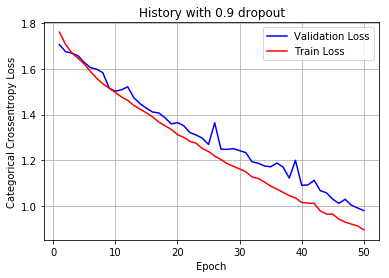

Test Loss: 0.9804
Test Accuracy: 0.8697

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  1      383       102        2                   0   
STANDING                 0       90       438        4                   0   
WALKING                  0        9        41      420                   1   
WALKING_DOWNSTAIRS       0        0         0       37                 381   
WALKING_UPSTAIRS         0        0         0       60                   7   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            3  
STANDING                           0  
WALKING                           25  
WALKING_DOWNSTAIRS                 2  
WALKING_UPSTAIRS                 404  


In [33]:
%matplotlib inline
# using a dense layer of 5 connections before last layer
# setting epochs to 50 and adding another batch normalization

drop = np.arange(0,1,.1)

for d in range(len(drop)):
    
    print(f'Starting tuning with dropout rate of {drop[d]:.1f}')
    
    # build keras model
    model = Sequential()
    model.add(CuDNNLSTM(256, input_shape=(timesteps, input_dim), return_sequences=True))
    model.add(Dropout(drop[d]))
    model.add(BatchNormalization())
    model.add(CuDNNLSTM(256))
    model.add(Dropout(drop[d]))
    model.add(BatchNormalization())
    model.add(Dense(5, activation='sigmoid'))
    model.add(Dense(n_classes, activation='sigmoid'))
    model.summary()

    model.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy',])


    history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

    vy = history.history['val_loss']
    ty = history.history['loss']

    fig, ax = plt.subplots(1,1)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Categorical Crossentropy Loss')

    x = list(range(1,51))

    # plot train and test loss
    plt_dynamic(x, vy, ty, ax, title=f'History with {drop[d]:.1f} dropout')

    scores, acc = model.evaluate(X_test, Y_test, verbose=0)
    print(f'Test Loss: {scores:.4f}')
    print(f'Test Accuracy: {acc:.4f}')

    # print confusion matrix
    print(f'\n{confusion_matrix(Y_test, model.predict(X_test))}')

Starting tuning with dropout rate of 0.0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_188 (CuDNNLSTM)   (None, 128, 256)          273408    
_________________________________________________________________
dropout_193 (Dropout)        (None, 128, 256)          0         
_________________________________________________________________
batch_normalization_109 (Bat (None, 128, 256)          1024      
_________________________________________________________________
cu_dnnlstm_189 (CuDNNLSTM)   (None, 256)               526336    
_________________________________________________________________
dropout_194 (Dropout)        (None, 256)               0         
_________________________________________________________________
batch_normalization_110 (Bat (None, 256)               1024      
_________________________________________________________________
dense_160 (Dense)            (None,

 - 6s - loss: 0.3859 - acc: 0.9652 - val_loss: 0.4269 - val_acc: 0.9348
Epoch 81/100
 - 6s - loss: 0.3833 - acc: 0.9626 - val_loss: 0.4165 - val_acc: 0.9413
Epoch 82/100
 - 6s - loss: 0.3712 - acc: 0.9645 - val_loss: 0.4291 - val_acc: 0.9352
Epoch 83/100
 - 6s - loss: 0.3656 - acc: 0.9642 - val_loss: 0.4408 - val_acc: 0.9284
Epoch 84/100
 - 6s - loss: 0.3565 - acc: 0.9650 - val_loss: 0.4083 - val_acc: 0.9372
Epoch 85/100
 - 6s - loss: 0.3508 - acc: 0.9664 - val_loss: 0.4203 - val_acc: 0.9301
Epoch 86/100
 - 6s - loss: 0.3445 - acc: 0.9655 - val_loss: 0.3759 - val_acc: 0.9437
Epoch 87/100
 - 6s - loss: 0.3404 - acc: 0.9652 - val_loss: 0.3991 - val_acc: 0.9257
Epoch 88/100
 - 6s - loss: 0.3363 - acc: 0.9635 - val_loss: 0.3785 - val_acc: 0.9399
Epoch 89/100
 - 6s - loss: 0.3290 - acc: 0.9627 - val_loss: 0.3691 - val_acc: 0.9440
Epoch 90/100
 - 6s - loss: 0.3206 - acc: 0.9674 - val_loss: 0.3641 - val_acc: 0.9389
Epoch 91/100
 - 6s - loss: 0.3129 - acc: 0.9675 - val_loss: 0.3986 - val_acc: 

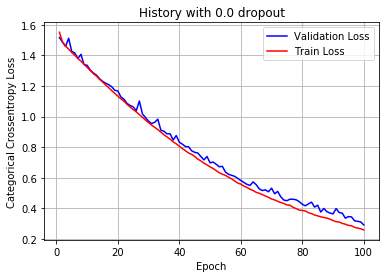

Test Loss: 0.2915
Test Accuracy: 0.9525

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  5      418        65        0                   0   
STANDING                 0       31       498        1                   1   
WALKING                  0        0         0      477                  17   
WALKING_DOWNSTAIRS       0        0         0        0                 417   
WALKING_UPSTAIRS         0        2         0        5                   4   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            3  
STANDING                           1  
WALKING                            2  
WALKING_DOWNSTAIRS                 3  
WALKING_UPSTAIRS                 460  
Starting tuning with d

Epoch 69/100
 - 7s - loss: 0.4989 - acc: 0.9597 - val_loss: 0.5731 - val_acc: 0.9270
Epoch 70/100
 - 7s - loss: 0.4902 - acc: 0.9589 - val_loss: 0.5532 - val_acc: 0.9311
Epoch 71/100
 - 7s - loss: 0.4829 - acc: 0.9600 - val_loss: 0.5481 - val_acc: 0.9257
Epoch 72/100
 - 7s - loss: 0.4739 - acc: 0.9604 - val_loss: 0.5248 - val_acc: 0.9406
Epoch 73/100
 - 7s - loss: 0.4641 - acc: 0.9619 - val_loss: 0.5202 - val_acc: 0.9335
Epoch 74/100
 - 7s - loss: 0.4573 - acc: 0.9612 - val_loss: 0.5317 - val_acc: 0.9250
Epoch 75/100
 - 7s - loss: 0.4473 - acc: 0.9623 - val_loss: 0.5105 - val_acc: 0.9311
Epoch 76/100
 - 7s - loss: 0.4418 - acc: 0.9612 - val_loss: 0.5059 - val_acc: 0.9247
Epoch 77/100
 - 7s - loss: 0.4311 - acc: 0.9635 - val_loss: 0.4990 - val_acc: 0.9284
Epoch 78/100
 - 7s - loss: 0.4192 - acc: 0.9630 - val_loss: 0.4742 - val_acc: 0.9376
Epoch 79/100
 - 7s - loss: 0.4163 - acc: 0.9633 - val_loss: 0.4841 - val_acc: 0.9264
Epoch 80/100
 - 7s - loss: 0.4154 - acc: 0.9592 - val_loss: 0.473

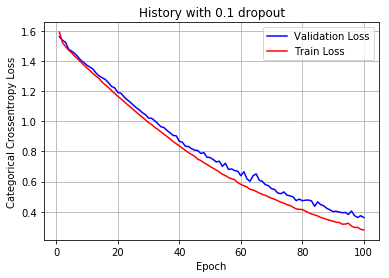

Test Loss: 0.3617
Test Accuracy: 0.9348

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  0      438        52        0                   0   
STANDING                 0       72       460        0                   0   
WALKING                  0        0         0      458                  37   
WALKING_DOWNSTAIRS       0        0         0        0                 420   
WALKING_UPSTAIRS         0        0         2       17                  10   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            1  
STANDING                           0  
WALKING                            1  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 442  
Starting tuning with d

Epoch 69/100
 - 7s - loss: 0.5770 - acc: 0.9499 - val_loss: 0.6016 - val_acc: 0.9260
Epoch 70/100
 - 7s - loss: 0.5685 - acc: 0.9471 - val_loss: 0.5944 - val_acc: 0.9206
Epoch 71/100
 - 7s - loss: 0.5593 - acc: 0.9464 - val_loss: 0.5954 - val_acc: 0.8982
Epoch 72/100
 - 7s - loss: 0.5514 - acc: 0.9482 - val_loss: 0.5879 - val_acc: 0.9206
Epoch 73/100
 - 7s - loss: 0.5429 - acc: 0.9484 - val_loss: 0.5766 - val_acc: 0.9118
Epoch 74/100
 - 7s - loss: 0.5345 - acc: 0.9470 - val_loss: 0.5933 - val_acc: 0.9087
Epoch 75/100
 - 7s - loss: 0.5272 - acc: 0.9520 - val_loss: 0.5663 - val_acc: 0.9230
Epoch 76/100
 - 7s - loss: 0.5197 - acc: 0.9540 - val_loss: 0.5455 - val_acc: 0.9243
Epoch 77/100
 - 7s - loss: 0.5099 - acc: 0.9559 - val_loss: 0.5417 - val_acc: 0.9338
Epoch 78/100
 - 7s - loss: 0.5058 - acc: 0.9494 - val_loss: 0.5891 - val_acc: 0.9152
Epoch 79/100
 - 7s - loss: 0.5002 - acc: 0.9544 - val_loss: 0.5428 - val_acc: 0.9145
Epoch 80/100
 - 7s - loss: 0.4896 - acc: 0.9502 - val_loss: 0.524

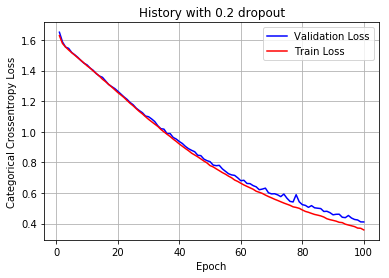

Test Loss: 0.4110
Test Accuracy: 0.9257

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  1      406        83        0                   0   
STANDING                 0       68       464        0                   0   
WALKING                  0        0         2      468                  24   
WALKING_DOWNSTAIRS       0        0         0        3                 415   
WALKING_UPSTAIRS         0        0         0        4                  29   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            1  
STANDING                           0  
WALKING                            2  
WALKING_DOWNSTAIRS                 2  
WALKING_UPSTAIRS                 438  
Starting tuning with d

Epoch 69/100
 - 7s - loss: 0.5684 - acc: 0.9645 - val_loss: 0.6057 - val_acc: 0.9427
Epoch 70/100
 - 7s - loss: 0.5593 - acc: 0.9640 - val_loss: 0.6108 - val_acc: 0.9332
Epoch 71/100
 - 7s - loss: 0.5470 - acc: 0.9635 - val_loss: 0.6103 - val_acc: 0.9389
Epoch 72/100
 - 7s - loss: 0.5342 - acc: 0.9668 - val_loss: 0.6274 - val_acc: 0.9230
Epoch 73/100
 - 7s - loss: 0.5325 - acc: 0.9642 - val_loss: 0.6466 - val_acc: 0.9162
Epoch 74/100
 - 7s - loss: 0.5159 - acc: 0.9660 - val_loss: 0.6204 - val_acc: 0.9172
Epoch 75/100
 - 7s - loss: 0.5101 - acc: 0.9645 - val_loss: 0.5885 - val_acc: 0.9298
Epoch 76/100
 - 7s - loss: 0.4989 - acc: 0.9678 - val_loss: 0.5840 - val_acc: 0.9335
Epoch 77/100
 - 7s - loss: 0.4893 - acc: 0.9656 - val_loss: 0.5568 - val_acc: 0.9393
Epoch 78/100
 - 7s - loss: 0.4771 - acc: 0.9687 - val_loss: 0.5341 - val_acc: 0.9450
Epoch 79/100
 - 7s - loss: 0.4689 - acc: 0.9680 - val_loss: 0.5528 - val_acc: 0.9291
Epoch 80/100
 - 7s - loss: 0.4624 - acc: 0.9675 - val_loss: 0.496

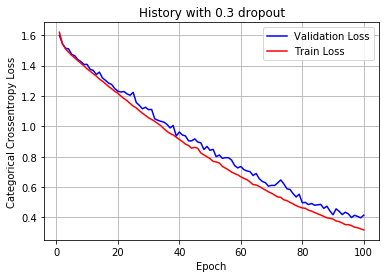

Test Loss: 0.4147
Test Accuracy: 0.9304

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  0      360       130        0                   0   
STANDING                 0       25       507        0                   0   
WALKING                  0        0         1      470                  22   
WALKING_DOWNSTAIRS       0        3         0        0                 412   
WALKING_UPSTAIRS         0       11         2        0                   2   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            1  
STANDING                           0  
WALKING                            3  
WALKING_DOWNSTAIRS                 5  
WALKING_UPSTAIRS                 456  
Starting tuning with d

Epoch 69/100
 - 7s - loss: 0.5978 - acc: 0.9569 - val_loss: 0.6380 - val_acc: 0.9376
Epoch 70/100
 - 7s - loss: 0.5877 - acc: 0.9587 - val_loss: 0.6289 - val_acc: 0.9386
Epoch 71/100
 - 7s - loss: 0.5795 - acc: 0.9576 - val_loss: 0.6213 - val_acc: 0.9345
Epoch 72/100
 - 7s - loss: 0.5709 - acc: 0.9577 - val_loss: 0.6244 - val_acc: 0.9247
Epoch 73/100
 - 7s - loss: 0.5593 - acc: 0.9599 - val_loss: 0.5997 - val_acc: 0.9301
Epoch 74/100
 - 7s - loss: 0.5541 - acc: 0.9584 - val_loss: 0.6037 - val_acc: 0.9308
Epoch 75/100
 - 7s - loss: 0.5402 - acc: 0.9621 - val_loss: 0.5966 - val_acc: 0.9301
Epoch 76/100
 - 6s - loss: 0.5374 - acc: 0.9570 - val_loss: 0.5865 - val_acc: 0.9247
Epoch 77/100
 - 7s - loss: 0.5260 - acc: 0.9572 - val_loss: 0.5698 - val_acc: 0.9332
Epoch 78/100
 - 6s - loss: 0.5194 - acc: 0.9611 - val_loss: 0.5797 - val_acc: 0.9226
Epoch 79/100
 - 6s - loss: 0.5086 - acc: 0.9610 - val_loss: 0.5631 - val_acc: 0.9318
Epoch 80/100
 - 7s - loss: 0.4993 - acc: 0.9614 - val_loss: 0.562

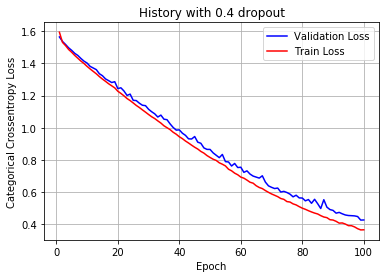

Test Loss: 0.4258
Test Accuracy: 0.9304

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  7      382       102        0                   0   
STANDING                 0       59       472        1                   0   
WALKING                  0        0         0      478                  17   
WALKING_DOWNSTAIRS       0        0         0        3                 410   
WALKING_UPSTAIRS         0        0         0        3                   5   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            0  
STANDING                           0  
WALKING                            1  
WALKING_DOWNSTAIRS                 7  
WALKING_UPSTAIRS                 463  
Starting tuning with d

Epoch 69/100
 - 7s - loss: 0.5837 - acc: 0.9546 - val_loss: 0.6587 - val_acc: 0.9104
Epoch 70/100
 - 7s - loss: 0.5738 - acc: 0.9547 - val_loss: 0.6365 - val_acc: 0.9169
Epoch 71/100
 - 7s - loss: 0.5646 - acc: 0.9561 - val_loss: 0.6071 - val_acc: 0.9267
Epoch 72/100
 - 7s - loss: 0.5547 - acc: 0.9565 - val_loss: 0.6381 - val_acc: 0.9084
Epoch 73/100
 - 7s - loss: 0.5464 - acc: 0.9543 - val_loss: 0.6030 - val_acc: 0.9308
Epoch 74/100
 - 7s - loss: 0.5387 - acc: 0.9561 - val_loss: 0.5788 - val_acc: 0.9298
Epoch 75/100
 - 7s - loss: 0.5322 - acc: 0.9546 - val_loss: 0.6220 - val_acc: 0.9033
Epoch 76/100
 - 7s - loss: 0.5241 - acc: 0.9546 - val_loss: 0.6017 - val_acc: 0.9162
Epoch 77/100
 - 7s - loss: 0.5143 - acc: 0.9567 - val_loss: 0.5905 - val_acc: 0.9155
Epoch 78/100
 - 7s - loss: 0.5082 - acc: 0.9563 - val_loss: 0.5868 - val_acc: 0.9097
Epoch 79/100
 - 7s - loss: 0.5067 - acc: 0.9516 - val_loss: 0.5470 - val_acc: 0.9267
Epoch 80/100
 - 7s - loss: 0.4933 - acc: 0.9539 - val_loss: 0.551

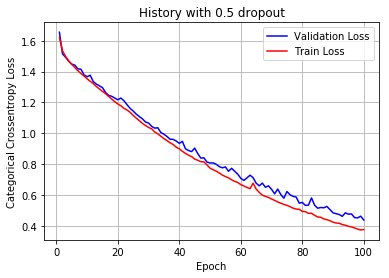

Test Loss: 0.4374
Test Accuracy: 0.9240

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  0      375       116        0                   0   
STANDING                 0       61       465        6                   0   
WALKING                  0        0         0      478                  15   
WALKING_DOWNSTAIRS       0        0         0        8                 410   
WALKING_UPSTAIRS         1        3         0        4                   5   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            0  
STANDING                           0  
WALKING                            3  
WALKING_DOWNSTAIRS                 2  
WALKING_UPSTAIRS                 458  
Starting tuning with d

Epoch 69/100
 - 7s - loss: 0.6393 - acc: 0.8040 - val_loss: 0.7208 - val_acc: 0.7594
Epoch 70/100
 - 7s - loss: 0.6310 - acc: 0.8048 - val_loss: 0.6918 - val_acc: 0.7723
Epoch 71/100
 - 7s - loss: 0.6213 - acc: 0.8066 - val_loss: 0.7181 - val_acc: 0.7543
Epoch 72/100
 - 7s - loss: 0.6187 - acc: 0.8036 - val_loss: 0.6642 - val_acc: 0.7818
Epoch 73/100
 - 7s - loss: 0.6099 - acc: 0.8052 - val_loss: 0.6689 - val_acc: 0.7699
Epoch 74/100
 - 7s - loss: 0.6007 - acc: 0.8070 - val_loss: 0.6688 - val_acc: 0.7771
Epoch 75/100
 - 7s - loss: 0.5978 - acc: 0.8039 - val_loss: 0.6559 - val_acc: 0.7652
Epoch 76/100
 - 7s - loss: 0.5873 - acc: 0.8074 - val_loss: 0.6664 - val_acc: 0.7710
Epoch 77/100
 - 7s - loss: 0.5794 - acc: 0.8097 - val_loss: 0.6438 - val_acc: 0.7757
Epoch 78/100
 - 7s - loss: 0.5756 - acc: 0.8036 - val_loss: 0.6807 - val_acc: 0.7672
Epoch 79/100
 - 7s - loss: 0.5675 - acc: 0.8062 - val_loss: 0.6609 - val_acc: 0.7570
Epoch 80/100
 - 7s - loss: 0.5619 - acc: 0.8077 - val_loss: 0.635

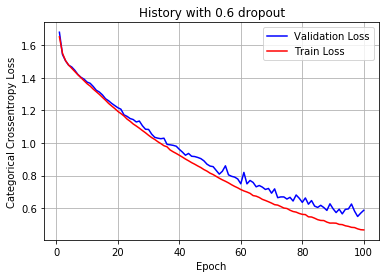

Test Loss: 0.5870
Test Accuracy: 0.7659

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 510        0        27        0                   0   
SITTING                  0      382       109        0                   0   
STANDING                 0       62       470        0                   0   
WALKING                  0        0         0      490                   6   
WALKING_DOWNSTAIRS       0        0         0       14                 405   
WALKING_UPSTAIRS         0       18         0      448                   5   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            0  
STANDING                           0  
WALKING                            0  
WALKING_DOWNSTAIRS                 1  
WALKING_UPSTAIRS                   0  
Starting tuning with d

Epoch 69/100
 - 7s - loss: 0.5309 - acc: 0.9505 - val_loss: 0.6025 - val_acc: 0.9141
Epoch 70/100
 - 7s - loss: 0.5397 - acc: 0.9416 - val_loss: 0.5830 - val_acc: 0.9203
Epoch 71/100
 - 7s - loss: 0.5208 - acc: 0.9483 - val_loss: 0.5883 - val_acc: 0.9189
Epoch 72/100
 - 7s - loss: 0.5113 - acc: 0.9493 - val_loss: 0.5632 - val_acc: 0.9189
Epoch 73/100
 - 7s - loss: 0.5047 - acc: 0.9518 - val_loss: 0.5687 - val_acc: 0.9158
Epoch 74/100
 - 7s - loss: 0.4985 - acc: 0.9483 - val_loss: 0.5621 - val_acc: 0.9196
Epoch 75/100
 - 7s - loss: 0.4910 - acc: 0.9494 - val_loss: 0.5689 - val_acc: 0.9141
Epoch 76/100
 - 7s - loss: 0.4772 - acc: 0.9533 - val_loss: 0.5928 - val_acc: 0.9036
Epoch 77/100
 - 7s - loss: 0.4763 - acc: 0.9514 - val_loss: 0.5158 - val_acc: 0.9321
Epoch 78/100
 - 7s - loss: 0.4640 - acc: 0.9553 - val_loss: 0.5213 - val_acc: 0.9199
Epoch 79/100
 - 7s - loss: 0.4593 - acc: 0.9517 - val_loss: 0.5376 - val_acc: 0.9121
Epoch 80/100
 - 7s - loss: 0.4554 - acc: 0.9472 - val_loss: 0.500

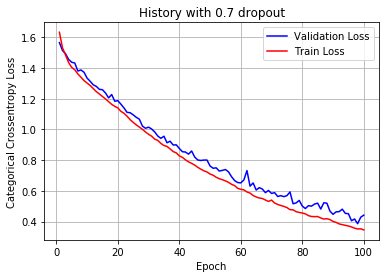

Test Loss: 0.4414
Test Accuracy: 0.9077

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 510       27         0        0                   0   
SITTING                  0      308       175        7                   0   
STANDING                 0       16       514        2                   0   
WALKING                  0        0         1      485                  10   
WALKING_DOWNSTAIRS       0        0         0        5                 412   
WALKING_UPSTAIRS         0        0         0       23                   2   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            1  
STANDING                           0  
WALKING                            0  
WALKING_DOWNSTAIRS                 3  
WALKING_UPSTAIRS                 446  
Starting tuning with d

Epoch 69/100
 - 7s - loss: 0.6499 - acc: 0.8085 - val_loss: 0.7416 - val_acc: 0.7652
Epoch 70/100
 - 7s - loss: 0.6418 - acc: 0.8073 - val_loss: 0.7555 - val_acc: 0.7574
Epoch 71/100
 - 7s - loss: 0.6356 - acc: 0.8074 - val_loss: 0.7730 - val_acc: 0.7523
Epoch 72/100
 - 7s - loss: 0.6294 - acc: 0.8079 - val_loss: 0.7362 - val_acc: 0.7693
Epoch 73/100
 - 7s - loss: 0.6233 - acc: 0.8086 - val_loss: 0.8806 - val_acc: 0.7221
Epoch 74/100
 - 7s - loss: 0.6173 - acc: 0.8073 - val_loss: 0.7522 - val_acc: 0.7547
Epoch 75/100
 - 7s - loss: 0.6056 - acc: 0.8101 - val_loss: 0.7624 - val_acc: 0.7438
Epoch 76/100
 - 7s - loss: 0.6122 - acc: 0.8060 - val_loss: 0.7268 - val_acc: 0.7720
Epoch 77/100
 - 7s - loss: 0.5959 - acc: 0.8103 - val_loss: 0.7532 - val_acc: 0.7503
Epoch 78/100
 - 7s - loss: 0.6030 - acc: 0.8063 - val_loss: 0.7305 - val_acc: 0.7598
Epoch 79/100
 - 7s - loss: 0.5912 - acc: 0.8077 - val_loss: 0.7696 - val_acc: 0.7543
Epoch 80/100
 - 7s - loss: 0.5899 - acc: 0.8074 - val_loss: 0.722

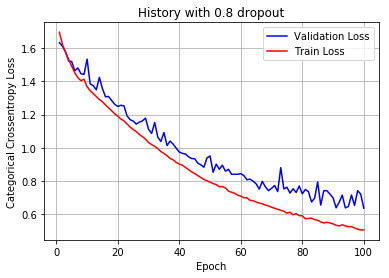

Test Loss: 0.6363
Test Accuracy: 0.7615

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  2      403        86        0                   0   
STANDING                 0      101       431        0                   0   
WALKING                  5        9         2      477                   3   
WALKING_DOWNSTAIRS      22        0         1        0                 396   
WALKING_UPSTAIRS       458        1         7        1                   4   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            0  
STANDING                           0  
WALKING                            0  
WALKING_DOWNSTAIRS                 1  
WALKING_UPSTAIRS                   0  
Starting tuning with d

Epoch 69/100
 - 7s - loss: 0.7650 - acc: 0.7829 - val_loss: 0.8245 - val_acc: 0.7499
Epoch 70/100
 - 7s - loss: 0.7535 - acc: 0.7844 - val_loss: 0.9547 - val_acc: 0.6905
Epoch 71/100
 - 7s - loss: 0.7501 - acc: 0.7836 - val_loss: 0.8160 - val_acc: 0.7503
Epoch 72/100
 - 7s - loss: 0.7387 - acc: 0.7860 - val_loss: 0.8857 - val_acc: 0.7095
Epoch 73/100
 - 7s - loss: 0.7343 - acc: 0.7856 - val_loss: 0.7926 - val_acc: 0.7574
Epoch 74/100
 - 7s - loss: 0.7249 - acc: 0.7878 - val_loss: 0.8428 - val_acc: 0.7346
Epoch 75/100
 - 7s - loss: 0.7248 - acc: 0.7854 - val_loss: 0.8756 - val_acc: 0.7170
Epoch 76/100
 - 7s - loss: 0.7144 - acc: 0.7884 - val_loss: 0.7992 - val_acc: 0.7435
Epoch 77/100
 - 7s - loss: 0.7118 - acc: 0.7848 - val_loss: 0.7445 - val_acc: 0.7611
Epoch 78/100
 - 7s - loss: 0.7061 - acc: 0.7852 - val_loss: 0.7879 - val_acc: 0.7387
Epoch 79/100
 - 7s - loss: 0.6935 - acc: 0.7896 - val_loss: 0.7666 - val_acc: 0.7435
Epoch 80/100
 - 7s - loss: 0.6907 - acc: 0.7882 - val_loss: 0.809

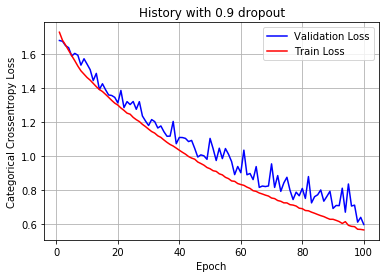

Test Loss: 0.5974
Test Accuracy: 0.9097

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  0      413        76        2                   0   
STANDING                 0       97       431        4                   0   
WALKING                  0        0        24      445                   0   
WALKING_DOWNSTAIRS       0        0         0        9                 409   
WALKING_UPSTAIRS         0        0         0       25                   0   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            0  
STANDING                           0  
WALKING                           27  
WALKING_DOWNSTAIRS                 2  
WALKING_UPSTAIRS                 446  


In [36]:
%matplotlib inline
# using a dense layer of 5 connections before last layer
# setting learning rate back to 1e-4, increasing epochs to 100, 
# BatchNormalization before dense layer(5)

drop = np.arange(0,1,.1)

for d in range(len(drop)):
    
    print(f'Starting tuning with dropout rate of {drop[d]:.1f}')
    
    # build keras model
    model = Sequential()
    model.add(CuDNNLSTM(256, input_shape=(timesteps, input_dim), return_sequences=True))
    model.add(Dropout(drop[d]))
    model.add(BatchNormalization())
    model.add(CuDNNLSTM(256))
    model.add(Dropout(drop[d]))
    model.add(BatchNormalization())
    model.add(Dense(5, activation='sigmoid'))
    model.add(Dense(n_classes, activation='sigmoid'))
    model.summary()

    model.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy',])


    history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

    vy = history.history['val_loss']
    ty = history.history['loss']

    fig, ax = plt.subplots(1,1)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Categorical Crossentropy Loss')

    x = list(range(1,101))

    # plot train and test loss
    plt_dynamic(x, vy, ty, ax, title=f'History with {drop[d]:.1f} dropout')

    scores, acc = model.evaluate(X_test, Y_test, verbose=0)
    print(f'Test Loss: {scores:.4f}')
    print(f'Test Accuracy: {acc:.4f}')

    # print confusion matrix
    print(f'\n{confusion_matrix(Y_test, model.predict(X_test))}')

# Final Architecture Tuning

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_208 (CuDNNLSTM)   (None, 128, 256)          273408    
_________________________________________________________________
batch_normalization_129 (Bat (None, 128, 256)          1024      
_________________________________________________________________
cu_dnnlstm_209 (CuDNNLSTM)   (None, 256)               526336    
_________________________________________________________________
batch_normalization_130 (Bat (None, 256)               1024      
_________________________________________________________________
dense_180 (Dense)            (None, 5)                 1285      
_________________________________________________________________
dense_181 (Dense)            (None, 6)                 36        
Total params: 803,113
Trainable params: 802,089
Non-trainable params: 1,024
_________________________________________________________________


Epoch 84/500
 - 6s - loss: 0.3518 - acc: 0.9694 - val_loss: 0.4254 - val_acc: 0.9291
Epoch 85/500
 - 6s - loss: 0.3498 - acc: 0.9656 - val_loss: 0.4319 - val_acc: 0.9243
Epoch 86/500
 - 6s - loss: 0.3484 - acc: 0.9612 - val_loss: 0.4295 - val_acc: 0.9226
Epoch 87/500
 - 6s - loss: 0.3389 - acc: 0.9645 - val_loss: 0.3922 - val_acc: 0.9372
Epoch 88/500
 - 6s - loss: 0.3259 - acc: 0.9671 - val_loss: 0.3965 - val_acc: 0.9274
Epoch 89/500
 - 6s - loss: 0.3232 - acc: 0.9653 - val_loss: 0.3905 - val_acc: 0.9359
Epoch 90/500
 - 6s - loss: 0.3147 - acc: 0.9678 - val_loss: 0.4149 - val_acc: 0.9223
Epoch 91/500
 - 6s - loss: 0.3079 - acc: 0.9667 - val_loss: 0.3918 - val_acc: 0.9233
Epoch 92/500
 - 6s - loss: 0.3053 - acc: 0.9664 - val_loss: 0.3771 - val_acc: 0.9335
Epoch 93/500
 - 6s - loss: 0.2957 - acc: 0.9686 - val_loss: 0.3756 - val_acc: 0.9281
Epoch 94/500
 - 6s - loss: 0.2926 - acc: 0.9668 - val_loss: 0.3636 - val_acc: 0.9369
Epoch 95/500
 - 6s - loss: 0.2845 - acc: 0.9680 - val_loss: 0.361

Epoch 180/500
 - 6s - loss: 0.0823 - acc: 0.9826 - val_loss: 0.2264 - val_acc: 0.9379
Epoch 181/500
 - 6s - loss: 0.0841 - acc: 0.9811 - val_loss: 0.1874 - val_acc: 0.9498
Epoch 182/500
 - 7s - loss: 0.0800 - acc: 0.9815 - val_loss: 0.2423 - val_acc: 0.9427
Epoch 183/500
 - 7s - loss: 0.0806 - acc: 0.9826 - val_loss: 0.2282 - val_acc: 0.9376
Epoch 184/500
 - 6s - loss: 0.0782 - acc: 0.9825 - val_loss: 0.2518 - val_acc: 0.9304
Epoch 185/500
 - 6s - loss: 0.0770 - acc: 0.9826 - val_loss: 0.2223 - val_acc: 0.9399
Epoch 186/500
 - 6s - loss: 0.0784 - acc: 0.9820 - val_loss: 0.2010 - val_acc: 0.9511
Epoch 187/500
 - 6s - loss: 0.0778 - acc: 0.9825 - val_loss: 0.2362 - val_acc: 0.9352
Epoch 188/500
 - 6s - loss: 0.0732 - acc: 0.9837 - val_loss: 0.1866 - val_acc: 0.9481
Epoch 189/500
 - 6s - loss: 0.0797 - acc: 0.9815 - val_loss: 0.1905 - val_acc: 0.9491
Epoch 190/500
 - 6s - loss: 0.0744 - acc: 0.9826 - val_loss: 0.1759 - val_acc: 0.9494
Epoch 191/500
 - 6s - loss: 0.0709 - acc: 0.9827 - val

Epoch 276/500
 - 6s - loss: 0.0214 - acc: 0.9951 - val_loss: 0.1150 - val_acc: 0.9691
Epoch 277/500
 - 6s - loss: 0.0226 - acc: 0.9951 - val_loss: 0.2035 - val_acc: 0.9474
Epoch 278/500
 - 6s - loss: 0.0215 - acc: 0.9956 - val_loss: 0.1279 - val_acc: 0.9661
Epoch 279/500
 - 6s - loss: 0.0218 - acc: 0.9946 - val_loss: 0.1444 - val_acc: 0.9634
Epoch 280/500
 - 6s - loss: 0.0173 - acc: 0.9963 - val_loss: 0.1869 - val_acc: 0.9535
Epoch 281/500
 - 6s - loss: 0.0179 - acc: 0.9961 - val_loss: 0.1622 - val_acc: 0.9620
Epoch 282/500
 - 6s - loss: 0.0194 - acc: 0.9956 - val_loss: 0.1644 - val_acc: 0.9579
Epoch 283/500
 - 6s - loss: 0.0193 - acc: 0.9948 - val_loss: 0.2135 - val_acc: 0.9498
Epoch 284/500
 - 6s - loss: 0.0219 - acc: 0.9946 - val_loss: 0.1620 - val_acc: 0.9600
Epoch 285/500
 - 6s - loss: 0.0190 - acc: 0.9947 - val_loss: 0.1771 - val_acc: 0.9562
Epoch 286/500
 - 6s - loss: 0.0196 - acc: 0.9955 - val_loss: 0.1937 - val_acc: 0.9511
Epoch 287/500
 - 7s - loss: 0.0185 - acc: 0.9955 - val

Epoch 372/500
 - 6s - loss: 0.0095 - acc: 0.9978 - val_loss: 0.1858 - val_acc: 0.9627
Epoch 373/500
 - 6s - loss: 0.0079 - acc: 0.9982 - val_loss: 0.1978 - val_acc: 0.9589
Epoch 374/500
 - 6s - loss: 0.0066 - acc: 0.9985 - val_loss: 0.2029 - val_acc: 0.9596
Epoch 375/500
 - 6s - loss: 0.0098 - acc: 0.9981 - val_loss: 0.1757 - val_acc: 0.9637
Epoch 376/500
 - 6s - loss: 0.0066 - acc: 0.9986 - val_loss: 0.2022 - val_acc: 0.9610
Epoch 377/500
 - 6s - loss: 0.0129 - acc: 0.9970 - val_loss: 0.2685 - val_acc: 0.9460
Epoch 378/500
 - 6s - loss: 0.0139 - acc: 0.9974 - val_loss: 0.2296 - val_acc: 0.9555
Epoch 379/500
 - 7s - loss: 0.0082 - acc: 0.9984 - val_loss: 0.2533 - val_acc: 0.9549
Epoch 380/500
 - 6s - loss: 0.0097 - acc: 0.9976 - val_loss: 0.2393 - val_acc: 0.9572
Epoch 381/500
 - 6s - loss: 0.0127 - acc: 0.9969 - val_loss: 0.1916 - val_acc: 0.9596
Epoch 382/500
 - 6s - loss: 0.0096 - acc: 0.9982 - val_loss: 0.2176 - val_acc: 0.9583
Epoch 383/500
 - 6s - loss: 0.0064 - acc: 0.9989 - val

Epoch 468/500
 - 7s - loss: 0.0072 - acc: 0.9986 - val_loss: 0.2412 - val_acc: 0.9637
Epoch 469/500
 - 7s - loss: 0.0020 - acc: 0.9996 - val_loss: 0.2122 - val_acc: 0.9647
Epoch 470/500
 - 6s - loss: 0.0055 - acc: 0.9988 - val_loss: 0.2549 - val_acc: 0.9617
Epoch 471/500
 - 6s - loss: 0.0035 - acc: 0.9992 - val_loss: 0.2537 - val_acc: 0.9634
Epoch 472/500
 - 6s - loss: 0.0072 - acc: 0.9986 - val_loss: 0.2340 - val_acc: 0.9640
Epoch 473/500
 - 6s - loss: 0.0045 - acc: 0.9990 - val_loss: 0.2527 - val_acc: 0.9613
Epoch 474/500
 - 6s - loss: 0.0025 - acc: 0.9993 - val_loss: 0.2412 - val_acc: 0.9637
Epoch 475/500
 - 6s - loss: 0.0126 - acc: 0.9980 - val_loss: 0.2948 - val_acc: 0.9549
Epoch 476/500
 - 6s - loss: 0.0068 - acc: 0.9985 - val_loss: 0.2932 - val_acc: 0.9559
Epoch 477/500
 - 7s - loss: 0.0051 - acc: 0.9989 - val_loss: 0.2526 - val_acc: 0.9600
Epoch 478/500
 - 7s - loss: 0.0042 - acc: 0.9992 - val_loss: 0.2720 - val_acc: 0.9569
Epoch 479/500
 - 7s - loss: 0.0023 - acc: 0.9995 - val

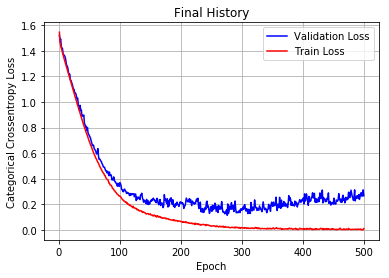

Test Loss: 0.2668
Test Accuracy: 0.9528

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 536        1         0        0                   0   
SITTING                  2      428        58        0                   0   
STANDING                 0       34       498        0                   0   
WALKING                  0        0         0      471                   6   
WALKING_DOWNSTAIRS       0        0         0        2                 410   
WALKING_UPSTAIRS         0        0         0        3                   3   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            3  
STANDING                           0  
WALKING                           19  
WALKING_DOWNSTAIRS                 8  
WALKING_UPSTAIRS                 465  


In [37]:
%matplotlib inline
# using a dense layer of 5 connections before last layer
# setting learning rate back to 1e-4, increasing epochs to 500, 
# BatchNormalization before dense layer(5)
# No Dropouts


# build keras model
model = Sequential()
model.add(CuDNNLSTM(256, input_shape=(timesteps, input_dim), return_sequences=True))
model.add(BatchNormalization())
model.add(CuDNNLSTM(256))
model.add(BatchNormalization())
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy',])


history = model.fit(X_train, Y_train, epochs=500, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

vy = history.history['val_loss']
ty = history.history['loss']

fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,501))

# plot train and test loss
plt_dynamic(x, vy, ty, ax, title=f'Final History')

scores, acc = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Loss: {scores:.4f}')
print(f'Test Accuracy: {acc:.4f}')

# print confusion matrix
print(f'\n{confusion_matrix(Y_test, model.predict(X_test))}')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_214 (CuDNNLSTM)   (None, 128, 256)          273408    
_________________________________________________________________
batch_normalization_135 (Bat (None, 128, 256)          1024      
_________________________________________________________________
cu_dnnlstm_215 (CuDNNLSTM)   (None, 256)               526336    
_________________________________________________________________
batch_normalization_136 (Bat (None, 256)               1024      
_________________________________________________________________
dense_186 (Dense)            (None, 4)                 1028      
_________________________________________________________________
dense_187 (Dense)            (None, 5)                 25        
_________________________________________________________________
dense_188 (Dense)            (None, 6)                 36        
Total para

 - 6s - loss: 0.8685 - acc: 0.6457 - val_loss: 0.9224 - val_acc: 0.6250
Epoch 83/300
 - 7s - loss: 0.8542 - acc: 0.6533 - val_loss: 0.9322 - val_acc: 0.6183
Epoch 84/300
 - 6s - loss: 0.8526 - acc: 0.6553 - val_loss: 0.9340 - val_acc: 0.6128
Epoch 85/300
 - 6s - loss: 0.8426 - acc: 0.6427 - val_loss: 0.9025 - val_acc: 0.6132
Epoch 86/300
 - 6s - loss: 0.8342 - acc: 0.6421 - val_loss: 0.9064 - val_acc: 0.6135
Epoch 87/300
 - 6s - loss: 0.8208 - acc: 0.6487 - val_loss: 0.8975 - val_acc: 0.6230
Epoch 88/300
 - 6s - loss: 0.8221 - acc: 0.6440 - val_loss: 0.8905 - val_acc: 0.6138
Epoch 89/300
 - 6s - loss: 0.8145 - acc: 0.6436 - val_loss: 0.8753 - val_acc: 0.6138
Epoch 90/300
 - 6s - loss: 0.8042 - acc: 0.6451 - val_loss: 0.8507 - val_acc: 0.6145
Epoch 91/300
 - 6s - loss: 0.7966 - acc: 0.6492 - val_loss: 0.8907 - val_acc: 0.5986
Epoch 92/300
 - 6s - loss: 0.7936 - acc: 0.6504 - val_loss: 0.8627 - val_acc: 0.6237
Epoch 93/300
 - 6s - loss: 0.7864 - acc: 0.6557 - val_loss: 0.8604 - val_acc: 

Epoch 178/300
 - 7s - loss: 0.3401 - acc: 0.9729 - val_loss: 0.4364 - val_acc: 0.9403
Epoch 179/300
 - 7s - loss: 0.3322 - acc: 0.9740 - val_loss: 0.4231 - val_acc: 0.9447
Epoch 180/300
 - 7s - loss: 0.3245 - acc: 0.9746 - val_loss: 0.4235 - val_acc: 0.9430
Epoch 181/300
 - 7s - loss: 0.3137 - acc: 0.9763 - val_loss: 0.3968 - val_acc: 0.9491
Epoch 182/300
 - 7s - loss: 0.3106 - acc: 0.9774 - val_loss: 0.4164 - val_acc: 0.9447
Epoch 183/300
 - 7s - loss: 0.3029 - acc: 0.9761 - val_loss: 0.4296 - val_acc: 0.9410
Epoch 184/300
 - 7s - loss: 0.2991 - acc: 0.9767 - val_loss: 0.4220 - val_acc: 0.9423
Epoch 185/300
 - 7s - loss: 0.2908 - acc: 0.9781 - val_loss: 0.4186 - val_acc: 0.9430
Epoch 186/300
 - 7s - loss: 0.2814 - acc: 0.9799 - val_loss: 0.3981 - val_acc: 0.9433
Epoch 187/300
 - 7s - loss: 0.2776 - acc: 0.9800 - val_loss: 0.3994 - val_acc: 0.9379
Epoch 188/300
 - 7s - loss: 0.2724 - acc: 0.9797 - val_loss: 0.3661 - val_acc: 0.9498
Epoch 189/300
 - 7s - loss: 0.2655 - acc: 0.9800 - val

Epoch 274/300
 - 6s - loss: 0.0505 - acc: 0.9936 - val_loss: 0.2286 - val_acc: 0.9535
Epoch 275/300
 - 6s - loss: 0.0519 - acc: 0.9943 - val_loss: 0.2698 - val_acc: 0.9460
Epoch 276/300
 - 6s - loss: 0.0515 - acc: 0.9933 - val_loss: 0.2678 - val_acc: 0.9457
Epoch 277/300
 - 7s - loss: 0.0555 - acc: 0.9922 - val_loss: 0.2303 - val_acc: 0.9535
Epoch 278/300
 - 6s - loss: 0.0492 - acc: 0.9944 - val_loss: 0.2219 - val_acc: 0.9583
Epoch 279/300
 - 6s - loss: 0.0479 - acc: 0.9944 - val_loss: 0.2116 - val_acc: 0.9576
Epoch 280/300
 - 7s - loss: 0.0541 - acc: 0.9917 - val_loss: 0.2561 - val_acc: 0.9477
Epoch 281/300
 - 6s - loss: 0.0428 - acc: 0.9954 - val_loss: 0.2333 - val_acc: 0.9542
Epoch 282/300
 - 6s - loss: 0.0452 - acc: 0.9942 - val_loss: 0.2717 - val_acc: 0.9467
Epoch 283/300
 - 6s - loss: 0.0468 - acc: 0.9950 - val_loss: 0.2172 - val_acc: 0.9555
Epoch 284/300
 - 6s - loss: 0.0457 - acc: 0.9940 - val_loss: 0.2655 - val_acc: 0.9491
Epoch 285/300
 - 6s - loss: 0.0404 - acc: 0.9952 - val

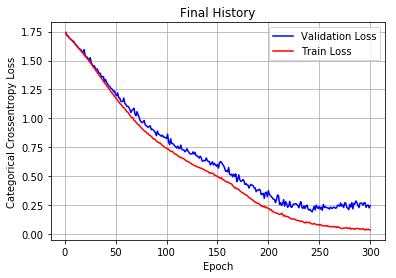

Test Loss: 0.2450
Test Accuracy: 0.9525

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                 21      434        33        0                   0   
STANDING                 0       17       512        1                   1   
WALKING                  0        1         0      458                  25   
WALKING_DOWNSTAIRS       1        6         0       13                 398   
WALKING_UPSTAIRS         0        3         0        0                   0   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            3  
STANDING                           1  
WALKING                           12  
WALKING_DOWNSTAIRS                 2  
WALKING_UPSTAIRS                 468  


In [40]:
%matplotlib inline
# using a dense layer of 4 connections before dense layer of 5
# using a dense layer of 5 connections before last layer
# setting learning rate to 1e-4, setting epochs to 300, 
# BatchNormalization before dense layer(5)
# No Dropouts


# build keras model
model = Sequential()
model.add(CuDNNLSTM(256, input_shape=(timesteps, input_dim), return_sequences=True))
model.add(BatchNormalization())
model.add(CuDNNLSTM(256))
model.add(BatchNormalization())
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy',])


history = model.fit(X_train, Y_train, epochs=300, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

vy = history.history['val_loss']
ty = history.history['loss']

fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,301))

# plot train and test loss
plt_dynamic(x, vy, ty, ax, title=f'Final History')

scores, acc = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Loss: {scores:.4f}')
print(f'Test Accuracy: {acc:.4f}')

# print confusion matrix
print(f'\n{confusion_matrix(Y_test, model.predict(X_test))}')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_216 (CuDNNLSTM)   (None, 128, 256)          273408    
_________________________________________________________________
batch_normalization_137 (Bat (None, 128, 256)          1024      
_________________________________________________________________
cu_dnnlstm_217 (CuDNNLSTM)   (None, 256)               526336    
_________________________________________________________________
batch_normalization_138 (Bat (None, 256)               1024      
_________________________________________________________________
dense_189 (Dense)            (None, 6)                 1542      
_________________________________________________________________
dense_190 (Dense)            (None, 5)                 35        
_________________________________________________________________
dense_191 (Dense)            (None, 6)                 36        
Total para

 - 7s - loss: 0.7267 - acc: 0.8317 - val_loss: 0.7741 - val_acc: 0.8079
Epoch 83/300
 - 7s - loss: 0.7164 - acc: 0.8330 - val_loss: 0.7879 - val_acc: 0.8001
Epoch 84/300
 - 7s - loss: 0.7096 - acc: 0.8317 - val_loss: 0.8091 - val_acc: 0.7910
Epoch 85/300
 - 7s - loss: 0.7032 - acc: 0.8303 - val_loss: 0.7569 - val_acc: 0.8059
Epoch 86/300
 - 7s - loss: 0.6954 - acc: 0.8313 - val_loss: 0.7541 - val_acc: 0.7995
Epoch 87/300
 - 7s - loss: 0.6852 - acc: 0.8319 - val_loss: 0.7372 - val_acc: 0.8045
Epoch 88/300
 - 7s - loss: 0.6810 - acc: 0.8315 - val_loss: 0.7614 - val_acc: 0.7913
Epoch 89/300
 - 7s - loss: 0.6707 - acc: 0.8309 - val_loss: 0.7305 - val_acc: 0.7950
Epoch 90/300
 - 7s - loss: 0.6638 - acc: 0.8319 - val_loss: 0.7277 - val_acc: 0.7964
Epoch 91/300
 - 7s - loss: 0.6614 - acc: 0.8308 - val_loss: 0.7162 - val_acc: 0.8015
Epoch 92/300
 - 7s - loss: 0.6529 - acc: 0.8298 - val_loss: 0.7180 - val_acc: 0.7967
Epoch 93/300
 - 7s - loss: 0.6359 - acc: 0.8350 - val_loss: 0.6948 - val_acc: 

Epoch 178/300
 - 7s - loss: 0.2261 - acc: 0.9827 - val_loss: 0.3411 - val_acc: 0.9437
Epoch 179/300
 - 7s - loss: 0.2316 - acc: 0.9822 - val_loss: 0.4172 - val_acc: 0.9226
Epoch 180/300
 - 7s - loss: 0.2241 - acc: 0.9812 - val_loss: 0.3382 - val_acc: 0.9437
Epoch 181/300
 - 7s - loss: 0.2141 - acc: 0.9837 - val_loss: 0.3550 - val_acc: 0.9410
Epoch 182/300
 - 7s - loss: 0.2136 - acc: 0.9820 - val_loss: 0.3661 - val_acc: 0.9362
Epoch 183/300
 - 7s - loss: 0.2053 - acc: 0.9849 - val_loss: 0.3746 - val_acc: 0.9396
Epoch 184/300
 - 7s - loss: 0.2057 - acc: 0.9857 - val_loss: 0.3375 - val_acc: 0.9437
Epoch 185/300
 - 7s - loss: 0.1972 - acc: 0.9871 - val_loss: 0.3434 - val_acc: 0.9379
Epoch 186/300
 - 7s - loss: 0.1941 - acc: 0.9861 - val_loss: 0.3157 - val_acc: 0.9484
Epoch 187/300
 - 7s - loss: 0.1950 - acc: 0.9850 - val_loss: 0.3207 - val_acc: 0.9460
Epoch 188/300
 - 7s - loss: 0.1961 - acc: 0.9857 - val_loss: 0.3316 - val_acc: 0.9437
Epoch 189/300
 - 7s - loss: 0.1951 - acc: 0.9844 - val

Epoch 274/300
 - 7s - loss: 0.0358 - acc: 0.9958 - val_loss: 0.2021 - val_acc: 0.9528
Epoch 275/300
 - 7s - loss: 0.0390 - acc: 0.9944 - val_loss: 0.2209 - val_acc: 0.9471
Epoch 276/300
 - 7s - loss: 0.0336 - acc: 0.9961 - val_loss: 0.2139 - val_acc: 0.9498
Epoch 277/300
 - 7s - loss: 0.0362 - acc: 0.9956 - val_loss: 0.2599 - val_acc: 0.9410
Epoch 278/300
 - 7s - loss: 0.0329 - acc: 0.9962 - val_loss: 0.2300 - val_acc: 0.9491
Epoch 279/300
 - 7s - loss: 0.0363 - acc: 0.9952 - val_loss: 0.2248 - val_acc: 0.9522
Epoch 280/300
 - 7s - loss: 0.0317 - acc: 0.9961 - val_loss: 0.2265 - val_acc: 0.9532
Epoch 281/300
 - 7s - loss: 0.0284 - acc: 0.9969 - val_loss: 0.2023 - val_acc: 0.9562
Epoch 282/300
 - 7s - loss: 0.0334 - acc: 0.9950 - val_loss: 0.2198 - val_acc: 0.9505
Epoch 283/300
 - 7s - loss: 0.0326 - acc: 0.9956 - val_loss: 0.2186 - val_acc: 0.9528
Epoch 284/300
 - 7s - loss: 0.0249 - acc: 0.9978 - val_loss: 0.2624 - val_acc: 0.9460
Epoch 285/300
 - 7s - loss: 0.0300 - acc: 0.9961 - val

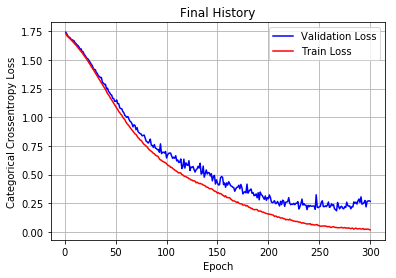

Test Loss: 0.2672
Test Accuracy: 0.9474

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  3      426        59        0                   0   
STANDING                 0       15       517        0                   0   
WALKING                  0        1         0      455                  39   
WALKING_DOWNSTAIRS       0        0         0        1                 416   
WALKING_UPSTAIRS         0        0         0        2                  28   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            3  
STANDING                           0  
WALKING                            1  
WALKING_DOWNSTAIRS                 3  
WALKING_UPSTAIRS                 441  


In [41]:
%matplotlib inline
# using a dense layer of 6 connections before dense layer of 5
# using a dense layer of 5 connections before last layer
# setting learning rate to 1e-4, setting epochs to 300, 
# BatchNormalization before dense layer(5)
# No Dropouts


# build keras model
model = Sequential()
model.add(CuDNNLSTM(256, input_shape=(timesteps, input_dim), return_sequences=True))
model.add(BatchNormalization())
model.add(CuDNNLSTM(256))
model.add(BatchNormalization())
model.add(Dense(6, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy',])


history = model.fit(X_train, Y_train, epochs=300, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

vy = history.history['val_loss']
ty = history.history['loss']

fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,301))

# plot train and test loss
plt_dynamic(x, vy, ty, ax, title=f'Final History')

scores, acc = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Loss: {scores:.4f}')
print(f'Test Accuracy: {acc:.4f}')

# print confusion matrix
print(f'\n{confusion_matrix(Y_test, model.predict(X_test))}')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_218 (CuDNNLSTM)   (None, 128, 256)          273408    
_________________________________________________________________
batch_normalization_139 (Bat (None, 128, 256)          1024      
_________________________________________________________________
cu_dnnlstm_219 (CuDNNLSTM)   (None, 256)               526336    
_________________________________________________________________
batch_normalization_140 (Bat (None, 256)               1024      
_________________________________________________________________
dense_192 (Dense)            (None, 6)                 1542      
_________________________________________________________________
dense_193 (Dense)            (None, 6)                 42        
Total params: 803,376
Trainable params: 802,352
Non-trainable params: 1,024
_________________________________________________________________


Epoch 84/300
 - 6s - loss: 0.3346 - acc: 0.9718 - val_loss: 0.4318 - val_acc: 0.9396
Epoch 85/300
 - 6s - loss: 0.3269 - acc: 0.9724 - val_loss: 0.4095 - val_acc: 0.9345
Epoch 86/300
 - 6s - loss: 0.3248 - acc: 0.9720 - val_loss: 0.4046 - val_acc: 0.9406
Epoch 87/300
 - 6s - loss: 0.3208 - acc: 0.9694 - val_loss: 0.3845 - val_acc: 0.9389
Epoch 88/300
 - 7s - loss: 0.3116 - acc: 0.9705 - val_loss: 0.4142 - val_acc: 0.9335
Epoch 89/300
 - 7s - loss: 0.3085 - acc: 0.9710 - val_loss: 0.3826 - val_acc: 0.9348
Epoch 90/300
 - 6s - loss: 0.3035 - acc: 0.9712 - val_loss: 0.4069 - val_acc: 0.9376
Epoch 91/300
 - 6s - loss: 0.3008 - acc: 0.9694 - val_loss: 0.4195 - val_acc: 0.9216
Epoch 92/300
 - 6s - loss: 0.2957 - acc: 0.9724 - val_loss: 0.3637 - val_acc: 0.9450
Epoch 93/300
 - 6s - loss: 0.2895 - acc: 0.9706 - val_loss: 0.4118 - val_acc: 0.9186
Epoch 94/300
 - 6s - loss: 0.2814 - acc: 0.9727 - val_loss: 0.4071 - val_acc: 0.9270
Epoch 95/300
 - 6s - loss: 0.2800 - acc: 0.9716 - val_loss: 0.350

Epoch 180/300
 - 7s - loss: 0.0504 - acc: 0.9901 - val_loss: 0.1902 - val_acc: 0.9562
Epoch 181/300
 - 7s - loss: 0.0547 - acc: 0.9886 - val_loss: 0.2157 - val_acc: 0.9427
Epoch 182/300
 - 7s - loss: 0.0537 - acc: 0.9899 - val_loss: 0.2432 - val_acc: 0.9450
Epoch 183/300
 - 6s - loss: 0.0487 - acc: 0.9899 - val_loss: 0.2387 - val_acc: 0.9430
Epoch 184/300
 - 6s - loss: 0.0499 - acc: 0.9897 - val_loss: 0.2371 - val_acc: 0.9416
Epoch 185/300
 - 6s - loss: 0.0503 - acc: 0.9895 - val_loss: 0.2018 - val_acc: 0.9484
Epoch 186/300
 - 6s - loss: 0.0434 - acc: 0.9912 - val_loss: 0.2270 - val_acc: 0.9444
Epoch 187/300
 - 6s - loss: 0.0479 - acc: 0.9887 - val_loss: 0.2213 - val_acc: 0.9444
Epoch 188/300
 - 6s - loss: 0.0504 - acc: 0.9898 - val_loss: 0.2825 - val_acc: 0.9338
Epoch 189/300
 - 6s - loss: 0.0467 - acc: 0.9898 - val_loss: 0.2392 - val_acc: 0.9406
Epoch 190/300
 - 7s - loss: 0.0435 - acc: 0.9917 - val_loss: 0.2195 - val_acc: 0.9488
Epoch 191/300
 - 7s - loss: 0.0406 - acc: 0.9917 - val

Epoch 276/300
 - 6s - loss: 0.0170 - acc: 0.9958 - val_loss: 0.3695 - val_acc: 0.9298
Epoch 277/300
 - 6s - loss: 0.0135 - acc: 0.9969 - val_loss: 0.2431 - val_acc: 0.9488
Epoch 278/300
 - 6s - loss: 0.0101 - acc: 0.9977 - val_loss: 0.2504 - val_acc: 0.9471
Epoch 279/300
 - 6s - loss: 0.0129 - acc: 0.9973 - val_loss: 0.2525 - val_acc: 0.9474
Epoch 280/300
 - 6s - loss: 0.0129 - acc: 0.9971 - val_loss: 0.2718 - val_acc: 0.9457
Epoch 281/300
 - 6s - loss: 0.0148 - acc: 0.9966 - val_loss: 0.2647 - val_acc: 0.9467
Epoch 282/300
 - 7s - loss: 0.0147 - acc: 0.9962 - val_loss: 0.2337 - val_acc: 0.9494
Epoch 283/300
 - 7s - loss: 0.0115 - acc: 0.9970 - val_loss: 0.2587 - val_acc: 0.9501
Epoch 284/300
 - 6s - loss: 0.0113 - acc: 0.9977 - val_loss: 0.2321 - val_acc: 0.9525
Epoch 285/300
 - 6s - loss: 0.0135 - acc: 0.9966 - val_loss: 0.2164 - val_acc: 0.9579
Epoch 286/300
 - 7s - loss: 0.0152 - acc: 0.9967 - val_loss: 0.3019 - val_acc: 0.9423
Epoch 287/300
 - 7s - loss: 0.0094 - acc: 0.9981 - val

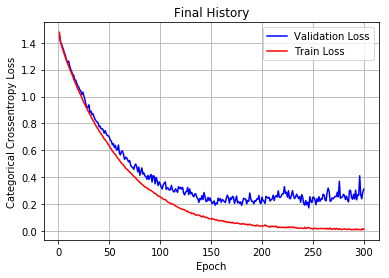

Test Loss: 0.3110
Test Accuracy: 0.9464

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  4      420        66        0                   0   
STANDING                 0       20       511        1                   0   
WALKING                  0        0         0      469                  22   
WALKING_DOWNSTAIRS       0        0         0        0                 409   
WALKING_UPSTAIRS         0        2         1        6                  19   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            1  
STANDING                           0  
WALKING                            5  
WALKING_DOWNSTAIRS                11  
WALKING_UPSTAIRS                 443  


In [42]:
%matplotlib inline
# using a dense layer of 6 connections before last layer
# setting learning rate to 1e-4, setting epochs to 300, 
# BatchNormalization before dense layer(5)
# No Dropouts


# build keras model
model = Sequential()
model.add(CuDNNLSTM(256, input_shape=(timesteps, input_dim), return_sequences=True))
model.add(BatchNormalization())
model.add(CuDNNLSTM(256))
model.add(BatchNormalization())
model.add(Dense(6, activation='sigmoid'))
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy',])


history = model.fit(X_train, Y_train, epochs=300, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

vy = history.history['val_loss']
ty = history.history['loss']

fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,301))

# plot train and test loss
plt_dynamic(x, vy, ty, ax, title=f'Final History')

scores, acc = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Loss: {scores:.4f}')
print(f'Test Accuracy: {acc:.4f}')

# print confusion matrix
print(f'\n{confusion_matrix(Y_test, model.predict(X_test))}')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_212 (CuDNNLSTM)   (None, 128, 256)          273408    
_________________________________________________________________
batch_normalization_133 (Bat (None, 128, 256)          1024      
_________________________________________________________________
cu_dnnlstm_213 (CuDNNLSTM)   (None, 256)               526336    
_________________________________________________________________
batch_normalization_134 (Bat (None, 256)               1024      
_________________________________________________________________
dense_184 (Dense)            (None, 5)                 1285      
_________________________________________________________________
dense_185 (Dense)            (None, 6)                 36        
Total params: 803,113
Trainable params: 802,089
Non-trainable params: 1,024
_________________________________________________________________


Epoch 84/500
 - 6s - loss: 1.4366 - acc: 0.6906 - val_loss: 1.4467 - val_acc: 0.6865
Epoch 85/500
 - 6s - loss: 1.4356 - acc: 0.7708 - val_loss: 1.4465 - val_acc: 0.8232
Epoch 86/500
 - 7s - loss: 1.4343 - acc: 0.8160 - val_loss: 1.4469 - val_acc: 0.8195
Epoch 87/500
 - 7s - loss: 1.4324 - acc: 0.8215 - val_loss: 1.4420 - val_acc: 0.8239
Epoch 88/500
 - 7s - loss: 1.4313 - acc: 0.8194 - val_loss: 1.4445 - val_acc: 0.8215
Epoch 89/500
 - 6s - loss: 1.4293 - acc: 0.8206 - val_loss: 1.4509 - val_acc: 0.8100
Epoch 90/500
 - 6s - loss: 1.4275 - acc: 0.8218 - val_loss: 1.4370 - val_acc: 0.8259
Epoch 91/500
 - 7s - loss: 1.4265 - acc: 0.8226 - val_loss: 1.4383 - val_acc: 0.8205
Epoch 92/500
 - 6s - loss: 1.4248 - acc: 0.8214 - val_loss: 1.4367 - val_acc: 0.8235
Epoch 93/500
 - 6s - loss: 1.4225 - acc: 0.8229 - val_loss: 1.4341 - val_acc: 0.8235
Epoch 94/500
 - 6s - loss: 1.4211 - acc: 0.8244 - val_loss: 1.4348 - val_acc: 0.8212
Epoch 95/500
 - 6s - loss: 1.4190 - acc: 0.8237 - val_loss: 1.438

Epoch 180/500
 - 7s - loss: 1.2861 - acc: 0.9553 - val_loss: 1.3118 - val_acc: 0.9376
Epoch 181/500
 - 7s - loss: 1.2846 - acc: 0.9532 - val_loss: 1.3037 - val_acc: 0.9267
Epoch 182/500
 - 6s - loss: 1.2826 - acc: 0.9553 - val_loss: 1.3108 - val_acc: 0.9362
Epoch 183/500
 - 6s - loss: 1.2810 - acc: 0.9554 - val_loss: 1.3014 - val_acc: 0.9321
Epoch 184/500
 - 6s - loss: 1.2794 - acc: 0.9561 - val_loss: 1.3002 - val_acc: 0.9223
Epoch 185/500
 - 6s - loss: 1.2776 - acc: 0.9557 - val_loss: 1.3186 - val_acc: 0.9152
Epoch 186/500
 - 6s - loss: 1.2762 - acc: 0.9533 - val_loss: 1.2947 - val_acc: 0.9284
Epoch 187/500
 - 6s - loss: 1.2749 - acc: 0.9543 - val_loss: 1.2906 - val_acc: 0.9247
Epoch 188/500
 - 6s - loss: 1.2727 - acc: 0.9547 - val_loss: 1.2909 - val_acc: 0.9291
Epoch 189/500
 - 7s - loss: 1.2705 - acc: 0.9573 - val_loss: 1.2911 - val_acc: 0.9308
Epoch 190/500
 - 7s - loss: 1.2690 - acc: 0.9563 - val_loss: 1.3032 - val_acc: 0.9182
Epoch 191/500
 - 6s - loss: 1.2682 - acc: 0.9551 - val

Epoch 276/500
 - 7s - loss: 1.1332 - acc: 0.9577 - val_loss: 1.1557 - val_acc: 0.9257
Epoch 277/500
 - 6s - loss: 1.1305 - acc: 0.9585 - val_loss: 1.1562 - val_acc: 0.9342
Epoch 278/500
 - 6s - loss: 1.1292 - acc: 0.9581 - val_loss: 1.1507 - val_acc: 0.9369
Epoch 279/500
 - 6s - loss: 1.1280 - acc: 0.9587 - val_loss: 1.1575 - val_acc: 0.9203
Epoch 280/500
 - 6s - loss: 1.1262 - acc: 0.9566 - val_loss: 1.1538 - val_acc: 0.9243
Epoch 281/500
 - 6s - loss: 1.1239 - acc: 0.9604 - val_loss: 1.1576 - val_acc: 0.9189
Epoch 282/500
 - 7s - loss: 1.1236 - acc: 0.9582 - val_loss: 1.1498 - val_acc: 0.9247
Epoch 283/500
 - 7s - loss: 1.1215 - acc: 0.9595 - val_loss: 1.1628 - val_acc: 0.9182
Epoch 284/500
 - 7s - loss: 1.1202 - acc: 0.9601 - val_loss: 1.1626 - val_acc: 0.9135
Epoch 285/500
 - 6s - loss: 1.1189 - acc: 0.9587 - val_loss: 1.1568 - val_acc: 0.9162
Epoch 286/500
 - 6s - loss: 1.1173 - acc: 0.9596 - val_loss: 1.1486 - val_acc: 0.9359
Epoch 287/500
 - 6s - loss: 1.1146 - acc: 0.9597 - val

Epoch 372/500
 - 6s - loss: 0.9848 - acc: 0.9619 - val_loss: 1.0165 - val_acc: 0.9335
Epoch 373/500
 - 6s - loss: 0.9850 - acc: 0.9591 - val_loss: 1.0212 - val_acc: 0.9301
Epoch 374/500
 - 7s - loss: 0.9817 - acc: 0.9615 - val_loss: 1.0243 - val_acc: 0.9233
Epoch 375/500
 - 6s - loss: 0.9807 - acc: 0.9610 - val_loss: 1.0155 - val_acc: 0.9386
Epoch 376/500
 - 6s - loss: 0.9784 - acc: 0.9634 - val_loss: 1.0163 - val_acc: 0.9260
Epoch 377/500
 - 6s - loss: 0.9789 - acc: 0.9596 - val_loss: 1.0278 - val_acc: 0.9152
Epoch 378/500
 - 6s - loss: 0.9759 - acc: 0.9626 - val_loss: 1.0415 - val_acc: 0.9009
Epoch 379/500
 - 6s - loss: 0.9761 - acc: 0.9595 - val_loss: 1.0146 - val_acc: 0.9243
Epoch 380/500
 - 7s - loss: 0.9741 - acc: 0.9610 - val_loss: 1.0122 - val_acc: 0.9274
Epoch 381/500
 - 6s - loss: 0.9724 - acc: 0.9623 - val_loss: 1.0331 - val_acc: 0.9118
Epoch 382/500
 - 6s - loss: 0.9713 - acc: 0.9603 - val_loss: 1.0026 - val_acc: 0.9287
Epoch 383/500
 - 6s - loss: 0.9684 - acc: 0.9625 - val

Epoch 468/500
 - 6s - loss: 0.8498 - acc: 0.9637 - val_loss: 0.8854 - val_acc: 0.9376
Epoch 469/500
 - 6s - loss: 0.8501 - acc: 0.9612 - val_loss: 0.8883 - val_acc: 0.9264
Epoch 470/500
 - 6s - loss: 0.8472 - acc: 0.9635 - val_loss: 0.8933 - val_acc: 0.9196
Epoch 471/500
 - 6s - loss: 0.8457 - acc: 0.9630 - val_loss: 0.8888 - val_acc: 0.9223
Epoch 472/500
 - 6s - loss: 0.8445 - acc: 0.9616 - val_loss: 0.8964 - val_acc: 0.9165
Epoch 473/500
 - 6s - loss: 0.8442 - acc: 0.9619 - val_loss: 0.8996 - val_acc: 0.9148
Epoch 474/500
 - 6s - loss: 0.8409 - acc: 0.9642 - val_loss: 0.8967 - val_acc: 0.9247
Epoch 475/500
 - 6s - loss: 0.8402 - acc: 0.9638 - val_loss: 0.8941 - val_acc: 0.9203
Epoch 476/500
 - 7s - loss: 0.8380 - acc: 0.9640 - val_loss: 0.8936 - val_acc: 0.9206
Epoch 477/500
 - 6s - loss: 0.8374 - acc: 0.9626 - val_loss: 0.8794 - val_acc: 0.9284
Epoch 478/500
 - 6s - loss: 0.8357 - acc: 0.9668 - val_loss: 0.8841 - val_acc: 0.9284
Epoch 479/500
 - 7s - loss: 0.8352 - acc: 0.9631 - val

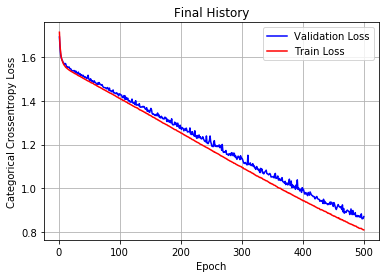

Test Loss: 0.8697
Test Accuracy: 0.9243

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  0      440        26        0                   0   
STANDING                 0      112       420        0                   0   
WALKING                  1        2         0      458                  26   
WALKING_DOWNSTAIRS       0        0         0        0                 414   
WALKING_UPSTAIRS         0        0         0        0                  16   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                           25  
STANDING                           0  
WALKING                            9  
WALKING_DOWNSTAIRS                 6  
WALKING_UPSTAIRS                 455  


In [39]:
%matplotlib inline
# using a dense layer of 5 connections before last layer
# setting learning rate to 1e-5, increasing epochs to 500, 
# BatchNormalization before dense layer(5)
# No Dropouts

rmsprop2= optimizers.RMSprop(lr=.00001)


# build keras model
model = Sequential()
model.add(CuDNNLSTM(256, input_shape=(timesteps, input_dim), return_sequences=True))
model.add(BatchNormalization())
model.add(CuDNNLSTM(256))
model.add(BatchNormalization())
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=rmsprop2, metrics=['accuracy',])


history = model.fit(X_train, Y_train, epochs=500, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

vy = history.history['val_loss']
ty = history.history['loss']

fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,501))

# plot train and test loss
plt_dynamic(x, vy, ty, ax, title=f'Final History')

scores, acc = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Loss: {scores:.4f}')
print(f'Test Accuracy: {acc:.4f}')

# print confusion matrix
print(f'\n{confusion_matrix(Y_test, model.predict(X_test))}')

# Summary

The first architecture on the table consistently has accuracy above 95% and often above 96% as well. This is a very stable architecture which may be finely tuned when time time permits.

epochs | learning rate | other hyper-parameters | loss | acc | val_loss | val_acc 
 --- | --- | --- | --- | --- | --- |
epochs=500 | rmsprop(lr=0.0001) | LSTM(256), BatchNormalization, LSTM(256), BatchNormalization, Dense(5, Sigmoid), Dense(6, sigmoid)  | 0.0102 | 0.9980 | 0.2668 | 0.9528 
epochs=300 | rmsprop(lr=0.0001) | LSTM(256), BatchNormalization, LSTM(256), BatchNormalization, Dense(4, Sigmoid), Dense(5, Sigmoid), Dense(6, sigmoid) | 0.0355 | 0.9954 | 0.2450 | 0.9525 
epochs=300 | rmsprop(lr=0.0001) | LSTM(256), BatchNormalization, LSTM(256), BatchNormalization, Dense(6, Sigmoid), Dense(5, Sigmoid), Dense(6, sigmoid) | 0.0182 | 0.9982 | 0.2672 | 0.9474 
epochs=300 | rmsprop(lr=0.0001) | LSTM(256), BatchNormalization, LSTM(256), BatchNormalization, Dense(6, Sigmoid), Dense(6, sigmoid)  | 0.0118 | 0.9971 | 0.3110 | 0.9464 
epochs=500 | rmsprop(lr=0.00001)| LSTM(256), BatchNormalization, LSTM(256), BatchNormalization, Dense(5, Sigmoid), Dense(6, sigmoid) |0.8086 | 0.9622 | 0.8697 | 0.9243 


# Narrative:
After hours of non-stop fine tuning various hyper-parameters. I have found a high performing architecture to result from carefully experimenting with three main parameters. 

1. RMSprop learning rate 
2. BatchNormalization
3. Dense layer sizes (and depth)

I noticed that no matter how much batch size, dropout, LSTM width or depth I added, I was not improving test accuracy above 91% and lowering test loss below 0.3. It was after hours of non-stop tuning that I thought about why I was struggling to improve accuracy above 91% when I realized the main reason accuracy wasn't improving was mainly due to the network unable to differentiate between __sitting and standing__. I then decided to add a dense layer of 5 neurons to bottleneck everything the LSTMs were learning and then force the network to distribute all the information back to 6 classes using 6 neurons. From here I noticed underfitting particularly when I used a learning rate of 1e-4 using epochs of 50 and 100 . I also noticed how smoothly the loss metric was converging towards a minima. This signaled that I was onto something. By adding a dense layer of 5 neurons right before the last layer, I forced the network to underfit, but in a way that allowed me keep making progress using a lower learning rate compared to everthing I tried before.